# Исследование успешности видеоигр в интернет-магазине

Я - владелец/менеджер интернет-магазинаь "Стримчик", продающая видеоигрысо всему миру. Из открытых источников доступны исторические данные о продажах игр за 2016 год, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Необходимо определить закономерности, влияющие успешность игры, для определения планов на грядущий 2017 год, выявления популярных продуктов и планировки рекламных кампаний.

***Цель исследования:***
1. Выявить какие факторы влияют на успешность продаж видеоигры;
2. Исследовать зависимость продаж от рейтингов критиков и пользователей;
3. Исследовать влияние продаж от жанра и возрастного рейтина на продажи;
4. Иследовение продаж в отдельных регионах.

***Ход исследования:***
1. Зарузка данных и предварительный анализ;
2. Предобработка данных для дальнейшего анализа;
3. Проведение исследовательского анализа данных;
4. Составление пользовательский портрет для отдельных регионов (Северная Америка, Европа, Япония);
5. Проведение статистического анализа данных;
6. Сделать общий вывод и дать рекомендации дя увеличения успешности интернет-магазина.

##  Загрузка данных
### Импортирование библиотек 

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats as st

### Загрузка данных

In [2]:
data = pd.read_csv('games.csv')

### Вывод фрагментов и общей информации датасета

Выведем основную информацию а датасете и основную информацию о нем.

In [3]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11034,Major League Baseball 2K11,DS,2011.0,Sports,0.08,0.00,0.00,0.01,NaN,tbd,E
4422,"SpongeBob SquarePants: Lights, Camera, Pants!",GC,2005.0,Misc,0.34,0.09,0.00,0.01,NaN,NaN,NaN
1728,Mission: Impossible,N64,1997.0,Action,0.74,0.38,0.02,0.03,NaN,NaN,NaN
10051,Blood Drive,X360,2010.0,Racing,0.09,0.01,0.00,0.01,40.0,6.5,M
5934,Sorcery,PS3,2012.0,Action,0.14,0.11,0.00,0.05,70.0,7.3,E10+


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Описание данных датасета `data`***

| Параметр | Описание |
| :-: | :--- |
| Name | название |
| Platform | платформа |
| Year_of_Release | год выпуска |
| Genre | жанр игры |
| NA_sales | продажи в Северной Америке (миллионы проданных копий) |
| EU_sales | продажи в Европе (миллионы проданных копий) |
| JP_sales | продажи в Японии (миллионы проданных копий) |
| Other_sales | продажи в других странах (миллионы проданных копий) |
| Critic_Score | оценка критиков (максимум 100) |
| User_Score | оценка пользователей (максимум 10) |
| Rating | рейтинг от организации ESRB |

### Описание столбца `Rating`
***Система рейтина ESRB*** <i>(англ. Entertainment Software Rating Board)</i>
<br>Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

| Рейтинг | Описание | Примеры игр |
| :-: | :--- | :--- |
| EC | Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. | Дора Исследовательница, Сказки Дракона. |
| E | Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. | Просто таннцуй, FIFA. | 
| E 10+ | Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. | Minecraft Dungeons, Растения против зомби. | 
| T | Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. | Fortnite, Sims 4. |
| M | Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. | Ark: Survival Evolved, Destiny 2. |
| AO | Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. | Grand Theft Auto V, Fallout 4. |
| RP | Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB. | | 

### Вывод
По предварительному просмотру данных датасета можно сделать следующие выводы:
1. В датастете `data` найдено 16715 записей;
2. Необходимо перевести все названия столбцов в нижний регистр;
3. Столбец года выпуска `Year_of_Release` нужно перевести в целочисленный тип;
4. Необходимо выяснить, почему столбец `User_Score` имеет тип `object` и перевести в вещественный тип `float`;
5. Необходимо проаналиировать и обработать пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`;
6. Провести поиск дубликатов;
7. Необходимо создать столбец продаж во всем мире (сумма продаж в столбцах `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`).

## Предобработка данных

### Копирование датасета

In [5]:
good_df = data.copy()

In [6]:
good_df.sample(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3051,Castlevania: Lords of Shadow,X360,2010.0,Action,0.42,0.17,0.01,0.05,83.0,7.8,M
5317,LEGO Marvel's Avengers,XOne,2016.0,Action,0.19,0.12,0.00,0.03,71.0,5.1,E10+
7685,The Thing,XB,2002.0,Adventure,0.15,0.04,0.00,0.01,78.0,6.6,M


### Перевод названий столбцов в нижний регистр

Переведем названия столбцов в нижний регистр из-за общей стилистики работы с датафремами pandas и более удобного обращения к этим столбцам.

In [7]:
good_df.columns = [x.lower() for x in good_df.columns]

Выведем названия столбцов после обработки, которые приобрели более привычный и приглядный вид для аналитиков.
<br><br>
***P.S.*** Метод `print` используется, чтоб значения списка распечатались в одну строку, иначе все значения выведутся с новой строки.

In [8]:
print(list(good_df.columns))

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


### Изменение типа столбца `year_of_release` в целочисленный тип `Int32`

Если посмотреть на значения столбца `year_of_release`, то можно обнаружить отсутствие дробной части. И так как этот столбец обозначает год выпуска, то целесообразнее перевести его в целочисленный тип `Int32`, который может принимать значение `NaN`.

***Причиной*** вещественного типа в этом столбце может служить наличие `NaN` значений, которые имеет тип `float`. 

In [9]:
print(list(good_df.year_of_release.unique()))

[2006.0, 1985.0, 2008.0, 2009.0, 1996.0, 1989.0, 1984.0, 2005.0, 1999.0, 2007.0, 2010.0, 2013.0, 2004.0, 1990.0, 1988.0, 2002.0, 2001.0, 2011.0, 1998.0, 2015.0, 2012.0, 2014.0, 1992.0, 1997.0, 1993.0, 1994.0, 1982.0, 2016.0, 2003.0, 1986.0, 2000.0, nan, 1995.0, 1991.0, 1981.0, 1987.0, 1980.0, 1983.0]


Переведем столбец `year_of_release` в тип `Int32`.

In [10]:
good_df.year_of_release = good_df.year_of_release.astype('Int32')

Значения в столбце приняли более приглядный вид.

In [11]:
print(list(good_df.year_of_release.unique()))

[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]


### Изменение типа столбца `user_score` в вещественный тип `float`

Выведем уникальные значения столбца `user_score` и увидим, что ненулевые значения являются строками. Также обнаружено строковое значение `tbd` <i>(англ. "To Be Determined.")</i>.

Необходимо перевести его в целочисленный тип `float`, чтоб столбец можно было использовать как количественный параметр. Поскольку с точки зрения анализа значение `tbd` не несет в себе ценности, его можно стереть и преобразовать в `nan`.

In [12]:
print(list(good_df.user_score.unique()))

['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4', '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2', '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3', '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8', '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7']


In [13]:
# Количество записей в столбце 'user_score' со значением 'tbd'
len(good_df[good_df.user_score == 'tbd'].user_score)

2424

In [14]:
# Количество записей в столбце 'user_score' со значением 'nan' до преобразования
len(good_df[good_df.user_score.isna()].user_score)

6701

In [15]:
good_df.loc[good_df.user_score == 'tbd', 'user_score'] = np.NaN

Переведем столбец `user_score` в тип `float`.

In [16]:
good_df.user_score = good_df.user_score.astype('float')

Проверим уникальные значения `user_score` после преобразования и убедимся, что данные приобрели вещественный тип

In [17]:
print(list(good_df.user_score.unique()))

[8.0, nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9.0, 7.9, 8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2, 9.2, 7.0, 7.3, 4.3, 7.6, 5.7, 5.0, 9.1, 6.5, 8.8, 6.9, 9.4, 6.8, 6.1, 6.7, 5.4, 4.0, 4.9, 4.5, 9.3, 6.2, 4.2, 6.0, 3.7, 4.1, 5.8, 5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5, 2.5, 1.9, 3.0, 2.7, 2.2, 2.0, 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0.0, 1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2, 0.6, 1.4, 0.9, 1.0, 9.7]


In [18]:
# Количество записей в столбце 'user_score' со значением 'nan' после преобразования
len(good_df[good_df.user_score.isna()].user_score)

9125

### Анализ и обработка пропусков

Вычислим общее количество пропусков в каждом столбце датафрейма и выясним какие нужно обработать.

In [19]:
good_df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

#### Обработка пропусков в столбцах  `name` и  `genre`

Выведем строки с пустующим значением столбца `name` и заметим, что в них также отсутствуют значения `genre`. 

***Причиной*** пропусков может богут быть технические неполадки или незаполнением сотрудником названия и жанра игры.

In [20]:
good_df[good_df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Поскольку эти игры выпущены в 1993 году, они не представляют особой ценности для прогноза на 2017 год.
<br>Отфильтруем эти строки из датасета.

In [21]:
good_df = good_df[~good_df.name.isna()]

Выведем те же строки после оброботки:

In [22]:
good_df[good_df.name == 'unknown']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Обработка пропусков в столбце `year_of_release`

Количество пропусков в столбце `year_of_release` равно 269, что составлят 1,6% от общего числа записей.

***Причиной*** пропусков может служить технические неполадки и незаполнением значений сотрудником, отвечающим за базу данных.

Поскольку количество пропусков невелико, в этих записях также присутствую пропуски рейтинга критиков и пользователе, то данные строки можно отфильтровать.

<i>***P.S.*** как идея, можно было бы использовать года выпусков игр для каждой из платформ, чтобы примерно прикинить годы выпуска для пропущенных значений.</i>

In [23]:
good_df.year_of_release.isna().sum()

269

In [24]:
good_df.year_of_release.isna().sum() / good_df.platform.count()

0.016095255190570215

In [25]:
good_df[good_df.year_of_release.isna()].isna().sum()

name                 0
platform             0
year_of_release    269
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       115
user_score         142
rating              88
dtype: int64

In [26]:
good_df = good_df[~good_df.year_of_release.isna()]

#### Анализ пропусков в столбце `critic_score`,  `user_score`, `rating`

Доли пропусков в столбцах `critic_score`, `user_score` (оценка критиков и пользователей) составляет 55%, 51% соответственно от обхего числа записей.

***Причиной*** пропусков могут быть технические неполадки или отсутствие значений рейтинга, взятих из сторонего ресура. Также пропуски в столбце `user_score` обусловленны стиранием значений `tbd` ранее.

Пропуски решено не обрабаотывать, поскольку столбцы не являются ключевыми при оценке.

In [27]:
# Количество пропусков в столбце 'critic_score'
good_df.critic_score.isna().sum()

8461

In [28]:
# Количество пропусков в столбце 'user_score'
good_df.user_score.isna().sum()

8981

In [29]:
# Доля пропусков в столбце 'user_score'
good_df.user_score.isna().sum() / good_df.platform.count()

0.5461566528825104

In [30]:
# Доля пропусков в столбце 'critic_score'
good_df.critic_score.isna().sum() / good_df.platform.count()

0.5145341765993675

#### Анализ и обработка пропусков в столбце  `rating`

Доли пропусков в столбцe `rating` (возрвстной рейтинг) составляет 40% от общего числа записей.

***Причиной*** пропусков могут быть технические неполадки или отсутствие значений рейтинга, взятих из сторонего ресура. Также пропуски в столбце `user_score` обусловленны стиранием значений `tbd` ранее.

Заполняем пропуски значениtv `unknown`.

In [31]:
# Количество пропусков в столбце 'rating'
good_df.rating.isna().sum()

6676

In [32]:
# Доля пропусков в столбце 'rating'
good_df.rating.isna().sum() / good_df.platform.count()

0.40598394551204087

In [33]:
good_df.loc[good_df.rating.isna(), 'rating'] = 'unknown'

### Поиск и обработка дубликатов

1. Явных дубликатов в датасете не найдено

In [34]:
good_df.duplicated().sum()

0

2. Среди неявных дубликатов по столбцам `name`, `platform`, `year_of_release` найдено две записи, одна из которой является результатом заполнения пропусков столбца `name` значением `unknown`.

In [35]:
good_df[good_df.duplicated(subset=['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


2.1. Изучим отдельно игру 'Madden NFL 13' на платформе 'PS3', где мы видим практически ождинаковые записи, отличающиеся только значениями продаж.

***Причиной*** такого разделения может быть заведение сотрудником в базу интернета-магазина одной и той же видеоигры дважды.

Поскольку для второй записи (с индексом 16230) значения продаж нулевые (за исключением мизерных продаж в Европе), удалим эту запись из датасета по индексу.

In [36]:
good_df.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [37]:
nfl_eu_sales = good_df.loc[16230, 'eu_sales']
good_df = good_df.drop(16230)
good_df.loc[604, 'eu_sales'] += nfl_eu_sales

Проверим логическим срезом обработку дубликатов

In [38]:
good_df.query('name == "Madden NFL 13" and platform == "PS3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83.0,5.5,E


### Создание столбца общих продаж видеоигр

Для анализа успешности игры необходимо суммировать значения столбцов `na_sales`, `eu_sales`, `jp_sales`, `other_sales` для каждой видеоигры в столбец `total_sales`, чтоб чтоб оценить общие продажи по всему миру.

In [39]:
good_df['total_sales'] = good_df.na_sales + good_df.eu_sales + good_df.jp_sales + good_df.other_sales

Проверим операцию. Выведем фрагмент датасета.

In [40]:
good_df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9136,Drawn to Life Collection,DS,2010,Misc,0.13,0.00,0.00,0.01,NaN,NaN,E,0.14
12593,Commandos: Strike Force,PS2,2006,Shooter,0.03,0.02,0.00,0.01,58.0,8.5,T,0.06
5425,Imagine: Movie Star,DS,2008,Simulation,0.31,0.00,0.00,0.03,NaN,NaN,E,0.34
7173,Spirit Camera: The Cursed Memoir,3DS,2012,Adventure,0.13,0.02,0.06,0.01,54.0,6.1,T,0.22
10274,ATV: Quad Frenzy,DS,2005,Racing,0.10,0.00,0.00,0.01,35.0,NaN,E,0.11


### Вывод
В ходе предобработки данных были проведены работы:
1. Замена названий столбцов датасета (перевод в нижний регистр);
2. Изменение типа столбца `year_of_release` в целочисленный тип `Int32`;
3. Изменение типа столбца `user_score` в вещественный тип `float`;
4. Анализ и обработка пропусков;
5. Поиск и обработка дубликатов;
6. Создан столбец общих продаж видеоигр `total_sales`.

In [41]:
temp = good_df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int32(1), float64(7), object(4)
memory usage: 2.1+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

## Исследовательский анализ данных

### Анализ года выпуска видеоигр

Построим столбчиковую диаграму распределения видеоигр по году выпуска.

Из графика мы видим, что самый активный период выпуска игр приходится на 2002 по 20011 года, после которого замечен  спад.

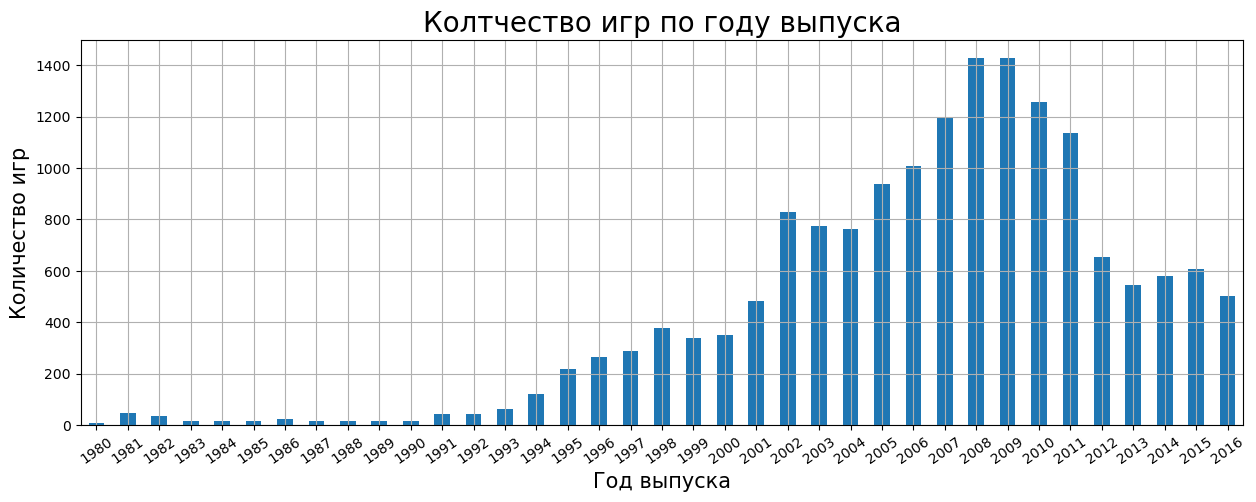

In [42]:
ax = good_df.year_of_release.value_counts().sort_index().plot.bar(figsize=(15, 5), grid=True, rot=35)
res = ax.set_title('Колтчество игр по году выпуска', fontsize=20)
res = ax.set_xlabel('Год выпуска', fontsize=15)
res = ax.set_ylabel('Количество игр', fontsize=15)

Доля игр, выпущеных в до 1993 года включительно составляет 2.2% от общего числа игр и неочень полезны для анализа и прогноза на 2017 год, поскольку они предназначены для старых платформ. Поэтому эти видеоигры можно отфильрровать.

In [43]:
good_df[good_df.year_of_release <= 1993].platform.count()

365

In [44]:
good_df[good_df.year_of_release <= 1993].platform.count() / good_df.platform.count() 

0.022197895761114153

In [45]:
good_df = good_df.drop(good_df[good_df.year_of_release <= 1993].index)

***Вывод:***
- Доля игр, выпущеных в до 1993 года включительно составляет 2.2% от общего числа игр и неочень полезны для анализа и прогноза на 2017 год, поскольку они предназначены для старых платформ. Видеоигры, выпущенные до 1993 года были отфильтрованы.

### Анализ продаж видеоигр по платформам

####  Анализ самых успешных платформ по продажам

Для начачала вычислим какие платформы наиболее популярные по количеству проданных копий.

In [46]:
platform_sales = good_df.groupby(['platform']).total_sales.agg(sum).sort_values(ascending=False).head(10)

In [47]:
platform_sales

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

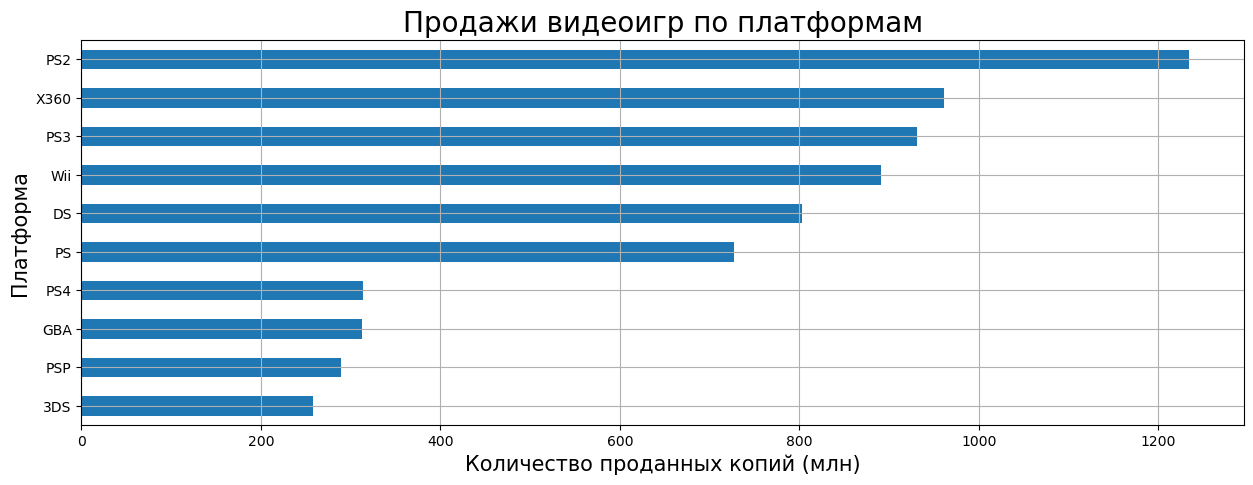

In [48]:
ax = platform_sales.sort_values(ascending=True).plot.barh(grid=True, figsize=(15, 5))
res = ax.set_title("Продажи видеоигр по платформам", fontsize=20)
res = ax.set_xlabel("Количество проданных копий (млн)", fontsize=15)
res = ax.set_ylabel("Платформа", fontsize=15)

####  Анализ успешных платформ по продажам видеоигр

Используя 10 самых популярных платформ, построим график продаж видеоигр по каждой успешной платформе.

/var/folders/dr/j4qk4lts0ng6yzjlrnb2qk5w0000gn/T/ipykernel_96088/3106709375.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


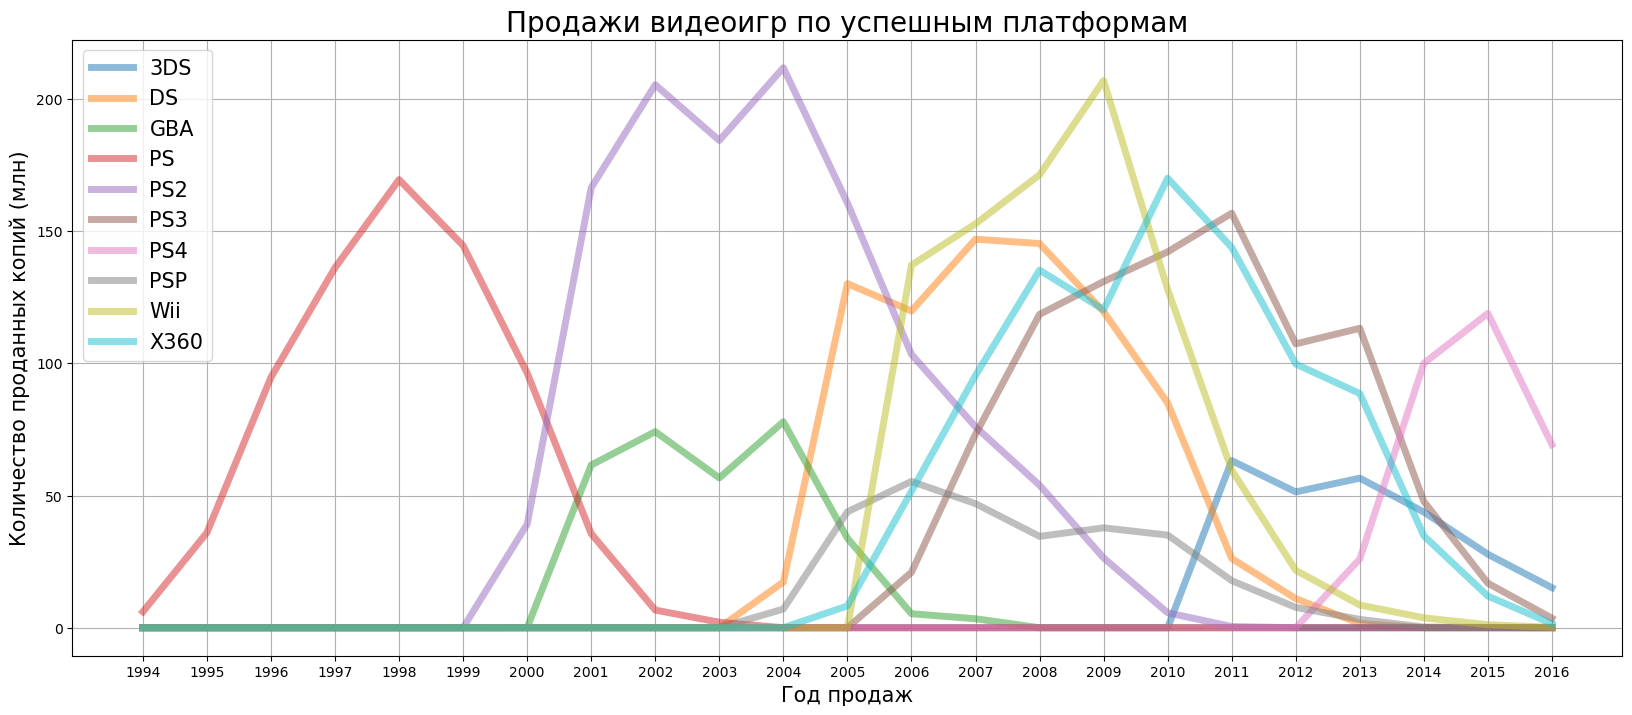

In [49]:
platform_sales_by_year = pd.pivot_table(
    good_df.query('platform in @platform_sales.index'),
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    fill_value=0,
)
ax = platform_sales_by_year.plot(figsize=(20, 8), alpha=0.5, grid=True, xticks=range(1994, 2017))
leg = ax.legend(fontsize=15, loc="upper left")
for legobj in leg.legendHandles:
    legobj.set_linewidth(5)
for line in ax.get_lines():
    line.set_linewidth(5)
res = ax.set_title("Продажи видеоигр по успешным платформам", fontsize=20)
res = ax.set_xlabel("Год продаж", fontsize=15)
res = ax.set_ylabel("Количество проданных копий (млн)", fontsize=15)

Вычислим сколько лет успешные платформа были актуальна (количество проданных копий за определенный год превышает 5 млн копий). Из них мы видим, этот срок достигает максимум ***11 лет***. Персональные компьютеры ***PC*** являются исключениями, поскольку они будут актуальны всегда.

In [50]:
platform_year_sales = good_df.groupby(['platform', 'year_of_release']).total_sales.sum()
platform_year_sales = platform_year_sales[platform_year_sales > 2]
platform_year_sales.groupby('platform').count().sort_values(ascending=False).head(10)

platform
PC      23
PS3     11
X360    11
PS2     11
PSP     10
PS      10
DS       9
Wii      9
GB       8
GBA      7
Name: total_sales, dtype: int64

***Вывод:*** 
- Платформа может быть актуальна максимум до 11 лет на рынке, после чего она становится невостребованной из-за устаревания.
- Несмотря на большое количество проданных копий для этих платформ, можно сказать, что они прошли свой пик продаж и на них нельзя сделать ставку на следующий 2017 год;
- Виден спад для всех платформ за 2016 год даже для PS4. Это может быть обсуловлено тем, что игры выпущенные за последний год еще не исчерпали потенциал и число проданных копий может еще увеличиться в следующем году, что войдет в статустику за этот год.

In [51]:
# temp для расчета используем полный датасет 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

### Анализ платформ за актуальный период

По аналогии с предыдущим пунктом сделаем аналогичный анализ, только в разрезе последних 5 лет c 2012 года (половина периода рентабельности платформы на рынке).

In [52]:
df_actual = good_df.query('year_of_release >= 2012')

/var/folders/dr/j4qk4lts0ng6yzjlrnb2qk5w0000gn/T/ipykernel_96088/2350226253.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df_actual = good_df.query('year_of_release >= 2012')


####  Анализ продаж по платформам, актуальные за последние 5 лет

In [53]:
platform_actual_sales = df_actual.groupby(['platform']).total_sales.sum().sort_values(ascending=False)

In [54]:
platform_actual_sales = platform_actual_sales[platform_actual_sales > 50]
platform_actual_sales

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
Name: total_sales, dtype: float64

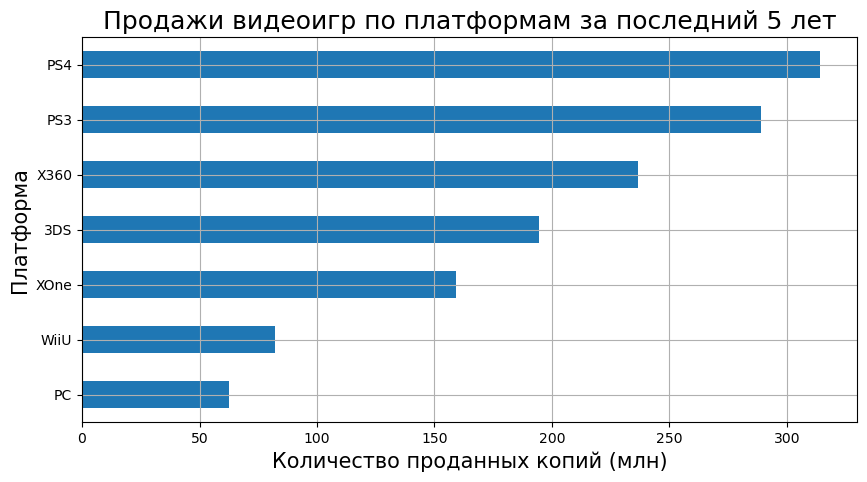

In [55]:
ax = platform_actual_sales.sort_values(ascending=True).plot.barh(grid=True, figsize=(10, 5))
res = ax.set_title("Продажи видеоигр по платформам за последний 5 лет", fontsize=18)
res = ax.set_xlabel("Количество проданных копий (млн)", fontsize=15)
res = ax.set_ylabel("Платформа", fontsize=15)

####  Анализ актуальных по платформам по годам

Используя все актуальные платформы за последние 5 лет, построим график продаж копий.

Виден спад для всех платформ за 2016 год даже для PS4. Это может быть обсуловлено тем, что игры выпущенные за последний год еще не исчерпали потенциал и число проданных копий может еще увеличиться в следующем году.

/var/folders/dr/j4qk4lts0ng6yzjlrnb2qk5w0000gn/T/ipykernel_96088/1384481793.py:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


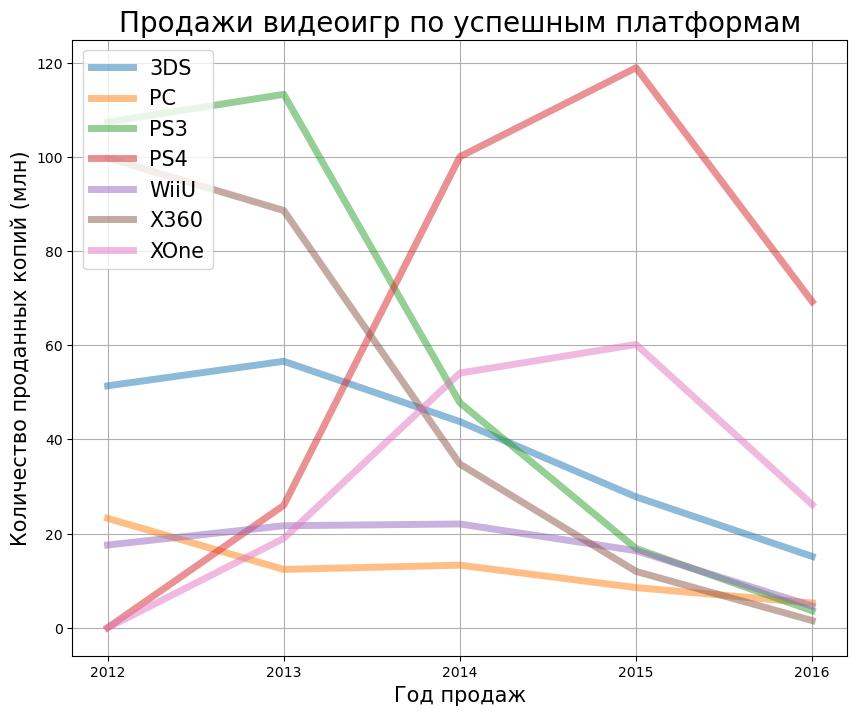

In [56]:
platform_actual_sales_by_year = pd.pivot_table(
    df_actual.query('platform in @platform_actual_sales.index'),
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum',
    fill_value=0,
)
ax = platform_actual_sales_by_year.plot(figsize=(10, 8), alpha=0.5, grid=True, xticks=range(2012, 2017))
leg = ax.legend(fontsize=15, loc="upper left")
for legobj in leg.legendHandles:
    legobj.set_linewidth(5)
for line in ax.get_lines():
    line.set_linewidth(5)
res = ax.set_title("Продажи видеоигр по успешным платформам", fontsize=20)
res = ax.set_xlabel("Год продаж", fontsize=15)
res = ax.set_ylabel("Количество проданных копий (млн)", fontsize=15)

***Вывод:***  
- Виден спад для всех платформ за 2016 год даже для PS4. Это может быть обсуловлено тем, что игры выпущенные за последний год еще не исчерпали потенциал и число проданных копий может еще увеличиться в следующем году, что войдет в статустику за этот год;
- Наиболее актуальными платформами для видеоигр являются ***PS4*** и ***XOne***, поскольку они за 2015 год видно увеличение продаж количества копий для этих двух. Причины спада за 2016 год объяснено пунктом выше.

### Анализ продаж видеоигр по платформам

Рассмотрим продажи игры, выпущенные за последние 3 года (с 2014) по каждой известной платформе. Построим коробчатую диаграмму проданных копий.

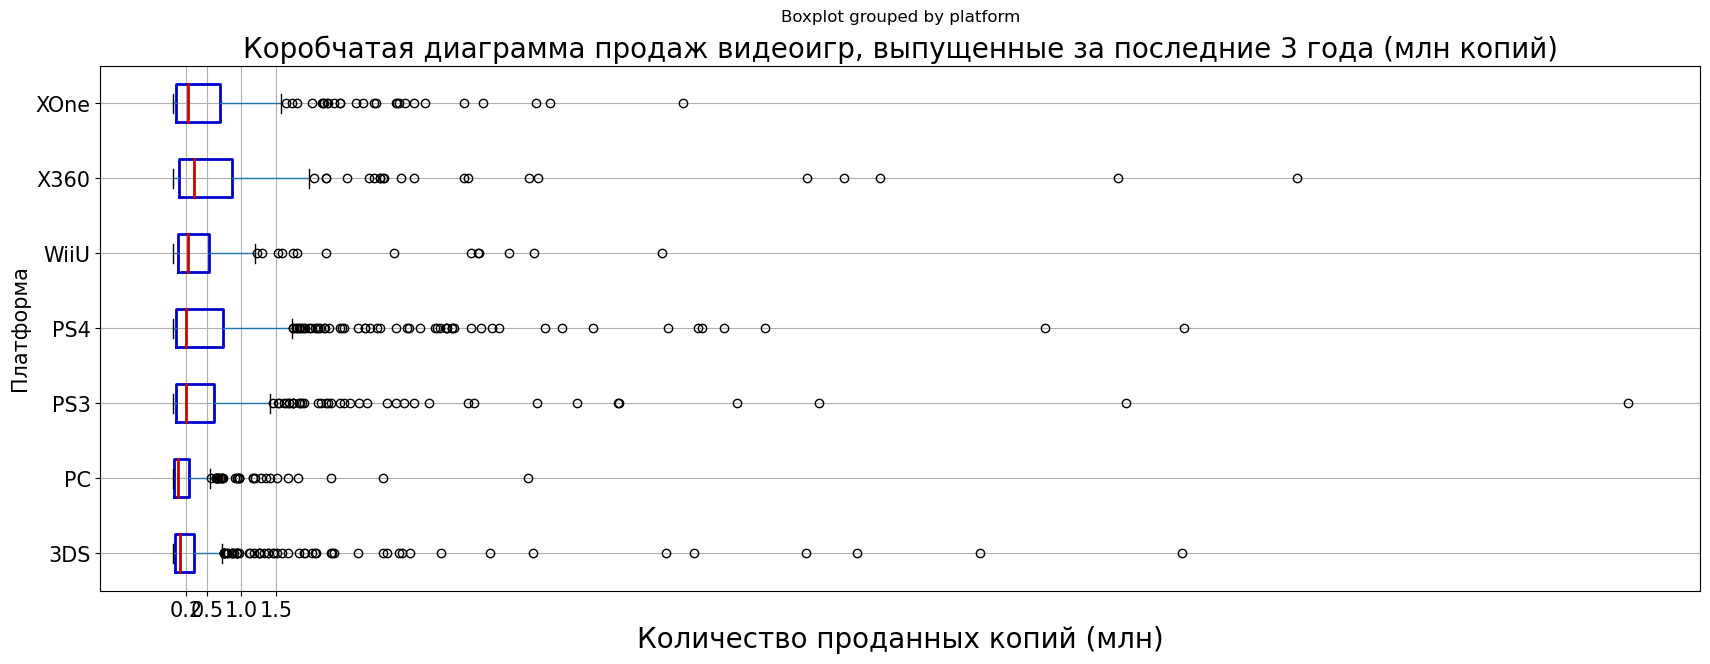

In [57]:
boxprops = dict(linewidth=2, color="#0000CC")
medianprops = dict(linewidth=2, color="#CC0000")
ax = (
    df_actual.query('platform in @platform_actual_sales.index')
        .boxplot(
            column='total_sales', 
            by='platform', 
            vert=False, 
            figsize=(20, 7),
            fontsize=15, 
            boxprops=boxprops,
            medianprops=medianprops,
        )
)
res = ax.set_xticks([0.2, 0.5, 1, 1.5])
res = ax.set_title("Коробчатая диаграмма продаж видеоигр, выпущенные за последние 3 года (млн копий)", fontsize = 20)
res = ax.set_xlabel("Количество проданных копий (млн)", fontsize = 20)
res = ax.set_ylabel("Платформа", fontsize = 15)

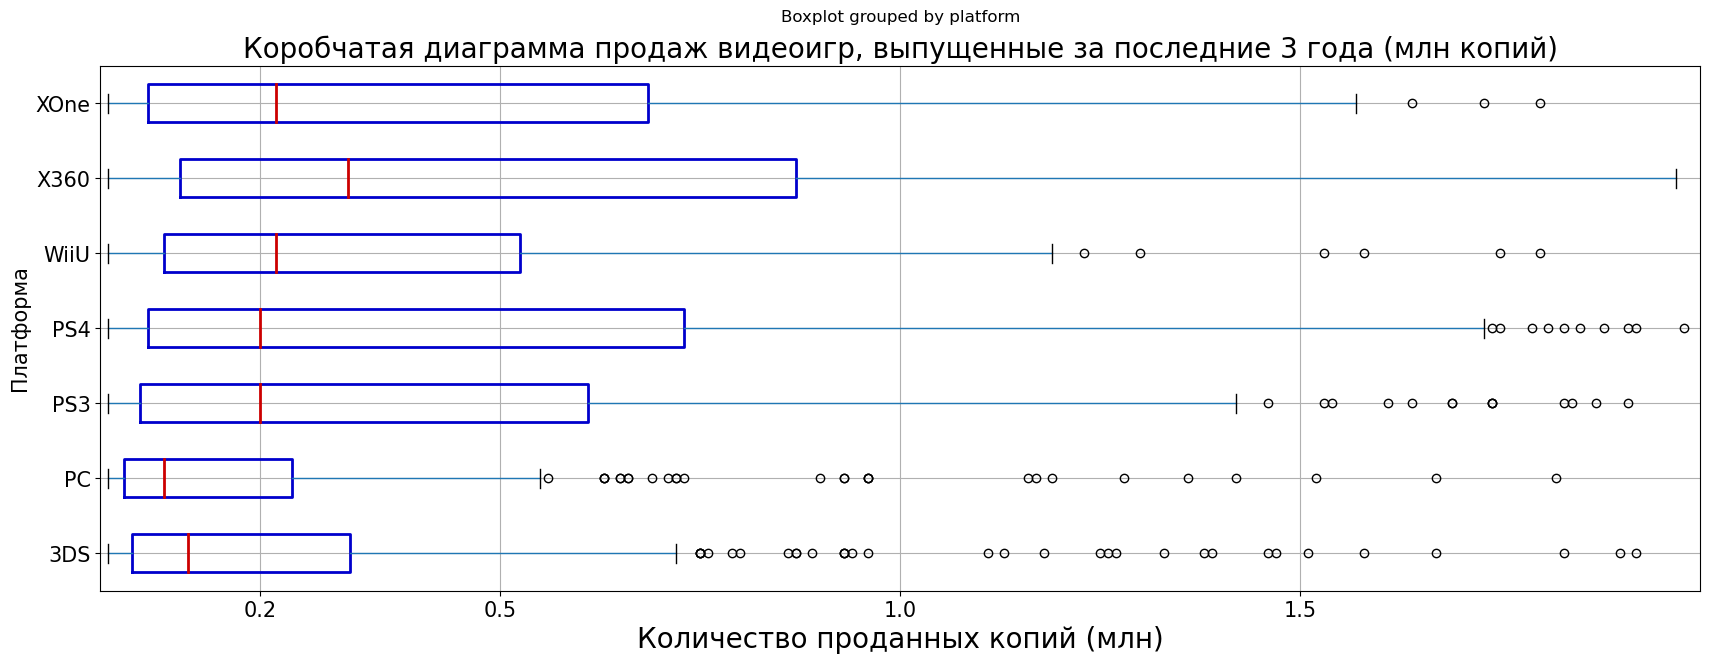

In [58]:
boxprops = dict(linewidth=2, color="#0000CC")
medianprops = dict(linewidth=2, color="#CC0000")
ax = (
    df_actual.query('platform in @platform_actual_sales.index')
        .boxplot(
            column='total_sales', 
            by='platform', 
            vert=False, 
            figsize=(20, 7),
            fontsize=15, 
            boxprops=boxprops,
            medianprops=medianprops,
        )
)
res = ax.set_xlim(0, 2)
res = ax.set_xticks([0.2, 0.5, 1, 1.5])
res = ax.set_title("Коробчатая диаграмма продаж видеоигр, выпущенные за последние 3 года (млн копий)", fontsize = 20)
res = ax.set_xlabel("Количество проданных копий (млн)", fontsize = 20)
res = ax.set_ylabel("Платформа", fontsize = 15)

***Вывод:***

Из диаграммы видно, что за последние 5 лет:
- Более ***25%*** игр (смотреть третью квартиь Q3) на платформах ***PS4, PS3, XOne, X360, WiiU*** продавались в размере более ***500*** тысяч копий;
- Более ***50%*** игр (смотреть третью медтиану Q2) на тех же платформах продавались в размере более ***200*** тысяч копий.

### Анализ рейтингов видеоигр на платформе PS4

Как было выяснено ранее, PS4 является самой успешной платформой по количеству копий за последние годы.
<br>Изучим насколько отзывы пользователей и критиков влияют на продажи видеоигр для PS4.

In [59]:
good_df.year_of_release.min()

1994

In [60]:
df_ps4 = good_df.query('platform == "PS4"')

In [61]:
df_ps4.year_of_release.min()

2013

Выведем значения корелляции для столбцов `critic_score`, `user_score`, `total_sales`, где мы видим:
- сильную кореляцию между продажами и оценкой критиков;
- слабую кореляцию между продажами и оценкой пользователей.

In [62]:
df_ps4[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Чтоб убедиться в взаимосвязи между продажами и оценкой критиков, построим диаграмму рассеивания для этих параметров.

По нему можно убедиться, что у игр нет шанса на успех без хорошей оценки критика. Для того, чтобы иметь шансы на большое количество продаж, необходимо обязательно иметь оценку критика не менее 70 из 100.

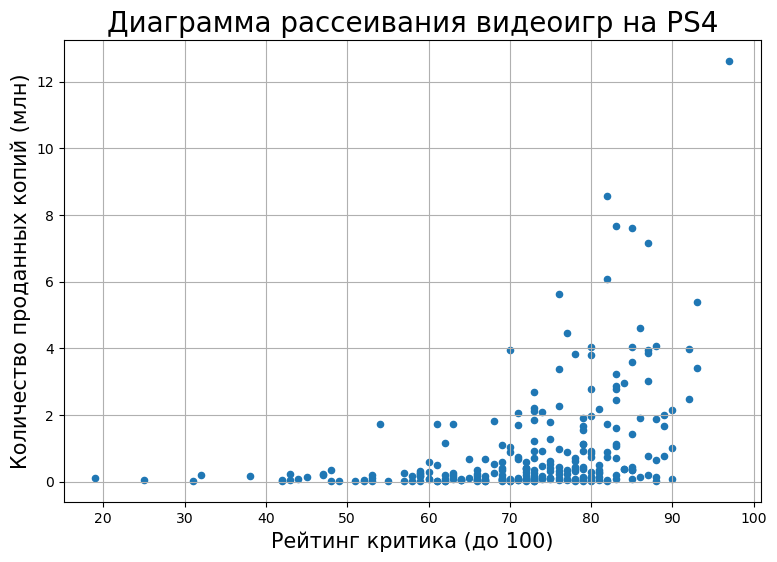

In [63]:
ax = df_ps4.plot.scatter(x='critic_score', y='total_sales', grid=True, figsize=(9, 6))
res = ax.set_title("Диаграмма рассеивания видеоигр на PS4", fontsize=20)
res = ax.set_xlabel("Рейтинг критика (до 100)", fontsize=15)
res = ax.set_ylabel("Количество проданных копий (млн)", fontsize=15)

По диаграмме рассеивания между продажами и рейтингом пользователей можно сделать вывод, что оценка пользователя не влияет на продажи. Дажи при низком рейтинге можно выпустить успешную игру.

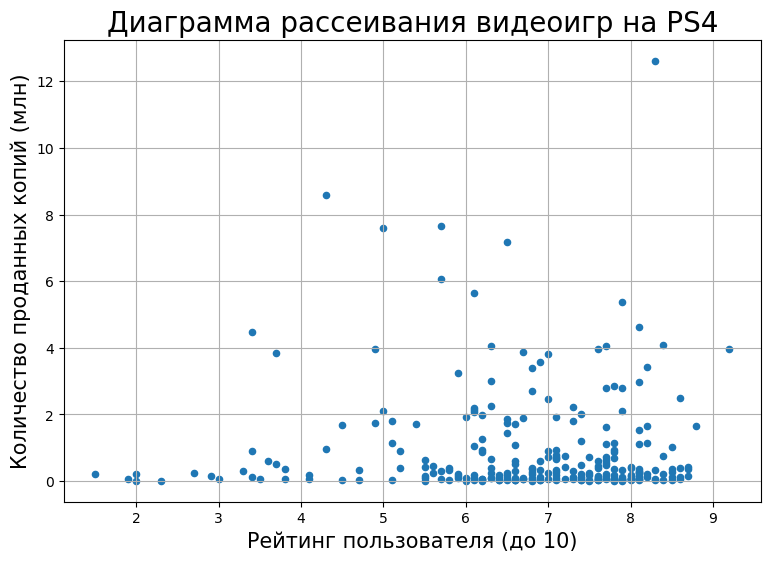

In [64]:
ax = df_ps4.plot.scatter(x='user_score', y='total_sales', grid=True, figsize=(9, 6))
res = ax.set_title("Диаграмма рассеивания видеоигр на PS4", fontsize=20)
res = ax.set_xlabel("Рейтинг пользователя (до 10)", fontsize=15)
res = ax.set_ylabel("Количество проданных копий (млн)", fontsize=15)

***Вывод:***
- Существует связь между оценкой критиков и суммой продаж. Чтобы иметь шансы на большое количество продаж, необходимо обязательно иметь оценку критика не менее 70 из 100.
- Оценка пользователя не влияет на продажи. Дажи при низком рейтинге можно выпустить успешную игру.

### Анализ рейтингов видеоигр на других платформах

По аналогии с предыдущим пунктом изучим насколько отзывы пользователей и критиков влияют на продажи видеоигр на других платформах.

In [65]:
df_platform_others = df_actual.query('platform != "PS4" and platform in @platform_actual_sales.index')

Выведем значения корелляции для столбцов `critic_score`, `user_score`, `total_sales` для других платфом, где мы видим:
- сильную кореляцию между продажами и оценкой критиков (как и на платформе ***PS***);
- сильную кореляцию между продажами и оценкой пользователей для платформ ***WiiU*** и ***3DS***.

In [66]:
df_platform_others.groupby('platform').apply(lambda x: x.critic_score.corr(x.total_sales))

platform
3DS     0.320803
PC      0.237243
PS3     0.334166
WiiU    0.348380
X360    0.360573
XOne    0.416998
dtype: float64

In [67]:
df_platform_others.groupby('platform').apply(lambda x: x.user_score.corr(x.total_sales))

platform
3DS     0.197583
PC     -0.121867
PS3    -0.006218
WiiU    0.400219
X360    0.006164
XOne   -0.068925
dtype: float64

По диаграмме рассеивания между продажами и рейтингом пользователей можно сделать аналогичный вывод, что оценка пользователя не влияет на продажи. Дажи при низком рейтинге можно выпустить успешную игру.

По нему можно убедиться, что у игр нет шанса на успех без хорошей оценки критика. Чем выше рейтинг критика, тем больше можно надеятся на большое количество проданных копий.

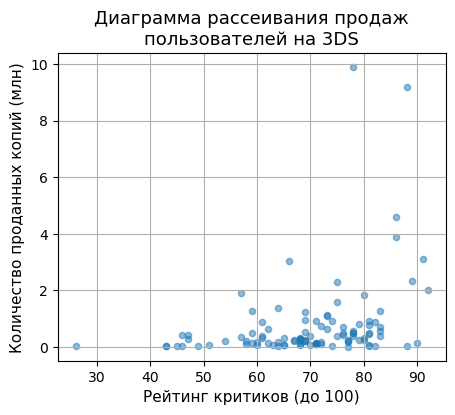

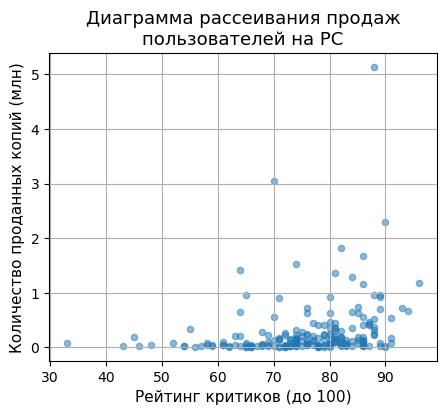

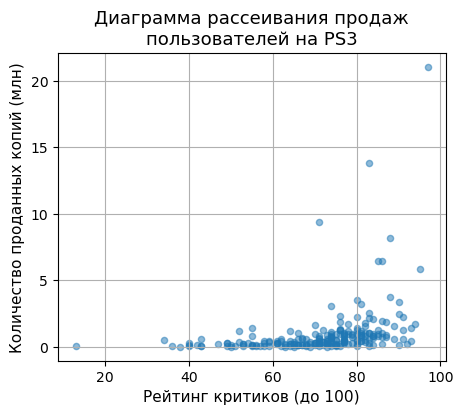

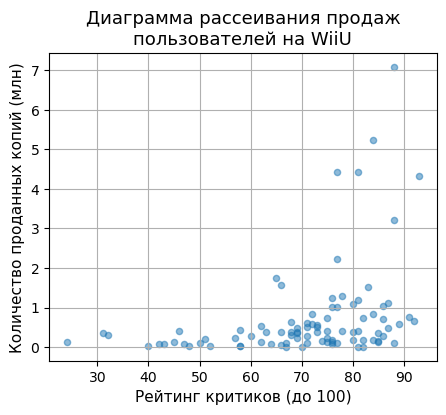

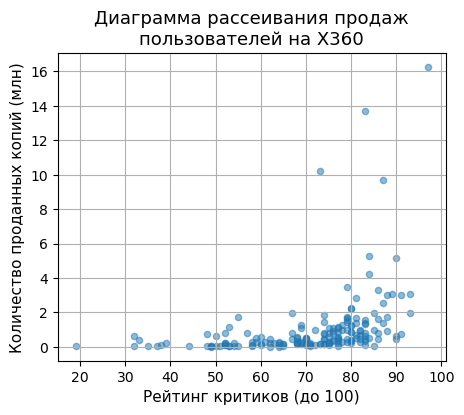

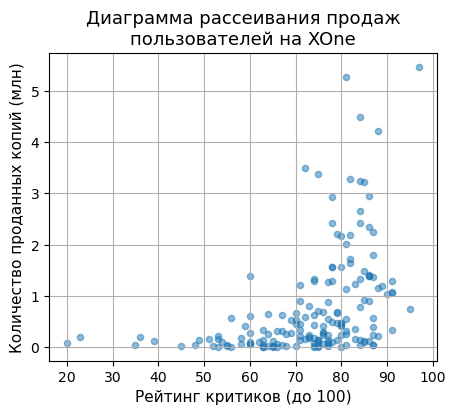

In [68]:
def platform_sales_scatter(x):
    ax = x.plot.scatter(x='critic_score', y='total_sales', grid=True, figsize=(5, 4), alpha=0.5)
    platform = x.iloc[0]['platform']
    res = ax.set_title(f'Диаграмма рассеивания продаж\nпользователей на {platform}', fontsize=13)
    res = ax.set_xlabel("Рейтинг критиков (до 100)", fontsize=11)
    res = ax.set_ylabel("Количество проданных копий (млн)", fontsize=11)

ax = df_platform_others.groupby('platform').apply(lambda x: platform_sales_scatter(x))

По диаграмме рассеивания и корелляцией между продажами и рейтингом пользователей можно сделать вывод, что существует связь  между этипи параметрами для платформ ***WiiU*** и ***3DS***. Чем выше рейтинг пользователя, тем больше шансов на большое количество проданных копий.

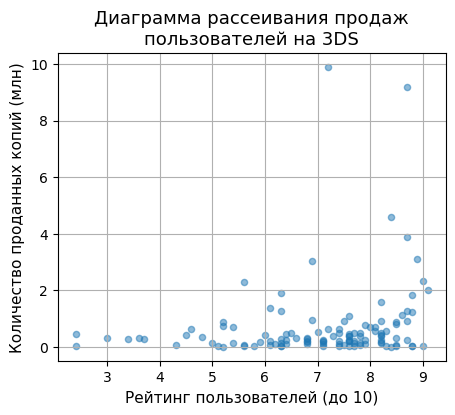

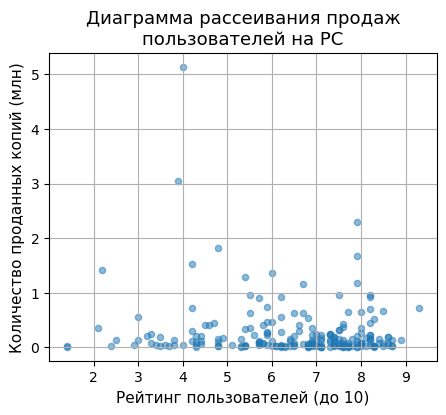

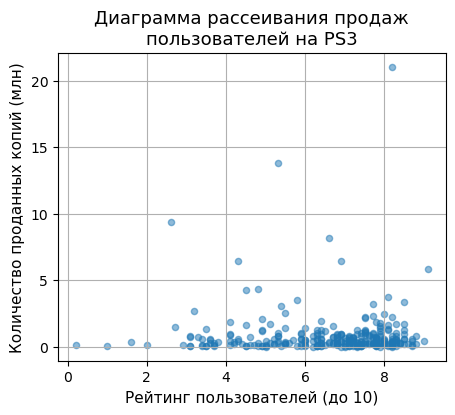

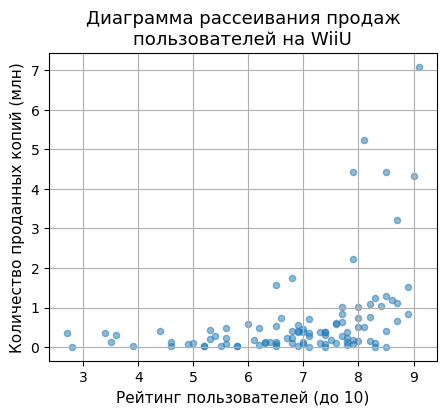

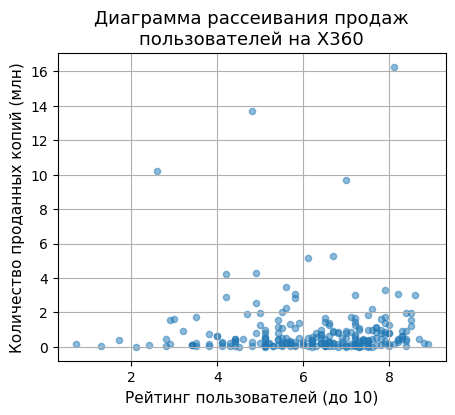

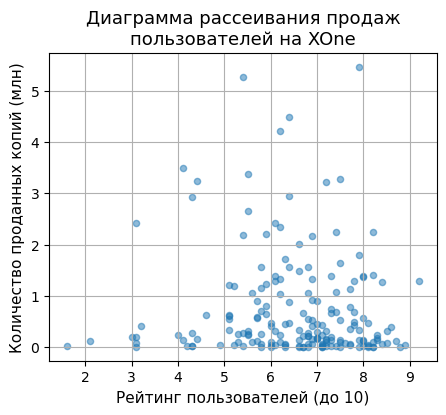

In [69]:
def platform_sales_scatter(x):
    ax = x.plot.scatter(x='user_score', y='total_sales', grid=True, figsize=(5, 4), alpha=0.5)
    platform = x.iloc[0]['platform']
    res = ax.set_title(f'Диаграмма рассеивания продаж\nпользователей на {platform}', fontsize=13)
    res = ax.set_xlabel("Рейтинг пользователей (до 10)", fontsize=11)
    res = ax.set_ylabel("Количество проданных копий (млн)", fontsize=11)

ax = df_platform_others.groupby('platform').apply(lambda x: platform_sales_scatter(x))

***Вывод:***
- Существует связь между оценкой критиков и суммой продаж для других платформ. Чем выше рейтинг критика, тем больше можно надеятся на большое количество проданных копий.
- Существует связь между оценкой пользователей и суммой продаж для платформ ***WiiU*** и ***3DS***. Чем выше рейтинг пользователей видеоигр на этих платформах, тем больше шансов на хорошие продажи видеоигр.
- Можно сказать, что выводы по взаимосвязи рейтингов критиков и пользователей и количеством проданных копий на ***PS4*** схожи с другими платформами. Исключением являются <i>ПОРТАТИВНЫЕ</i> платформы ***WiiU*** и ***3DS***, где существует связь между рейтингом пользователей с продажами.

### Анализ жанров видеоигр

#### Продажи видеоигр по жанрам

Проанализируем коробчатую диаграмму продаж видеоигр по жанрам (выпущенные с 2012).

Можно выделить 4 жанра, медианные продажи (Q2) которых состовляют от 200 тысяч копий, а продажи 25% самых успешных игр этих жанров составляют от 500 тысяч копий (Q3): ***Shooter, Sport, Platform***.

Самыми невостребованные можно выделитть те, чьи медианна игры продаются менее чем 100 тысяч копий: ***Adventure, Puzzle, Strategy***.


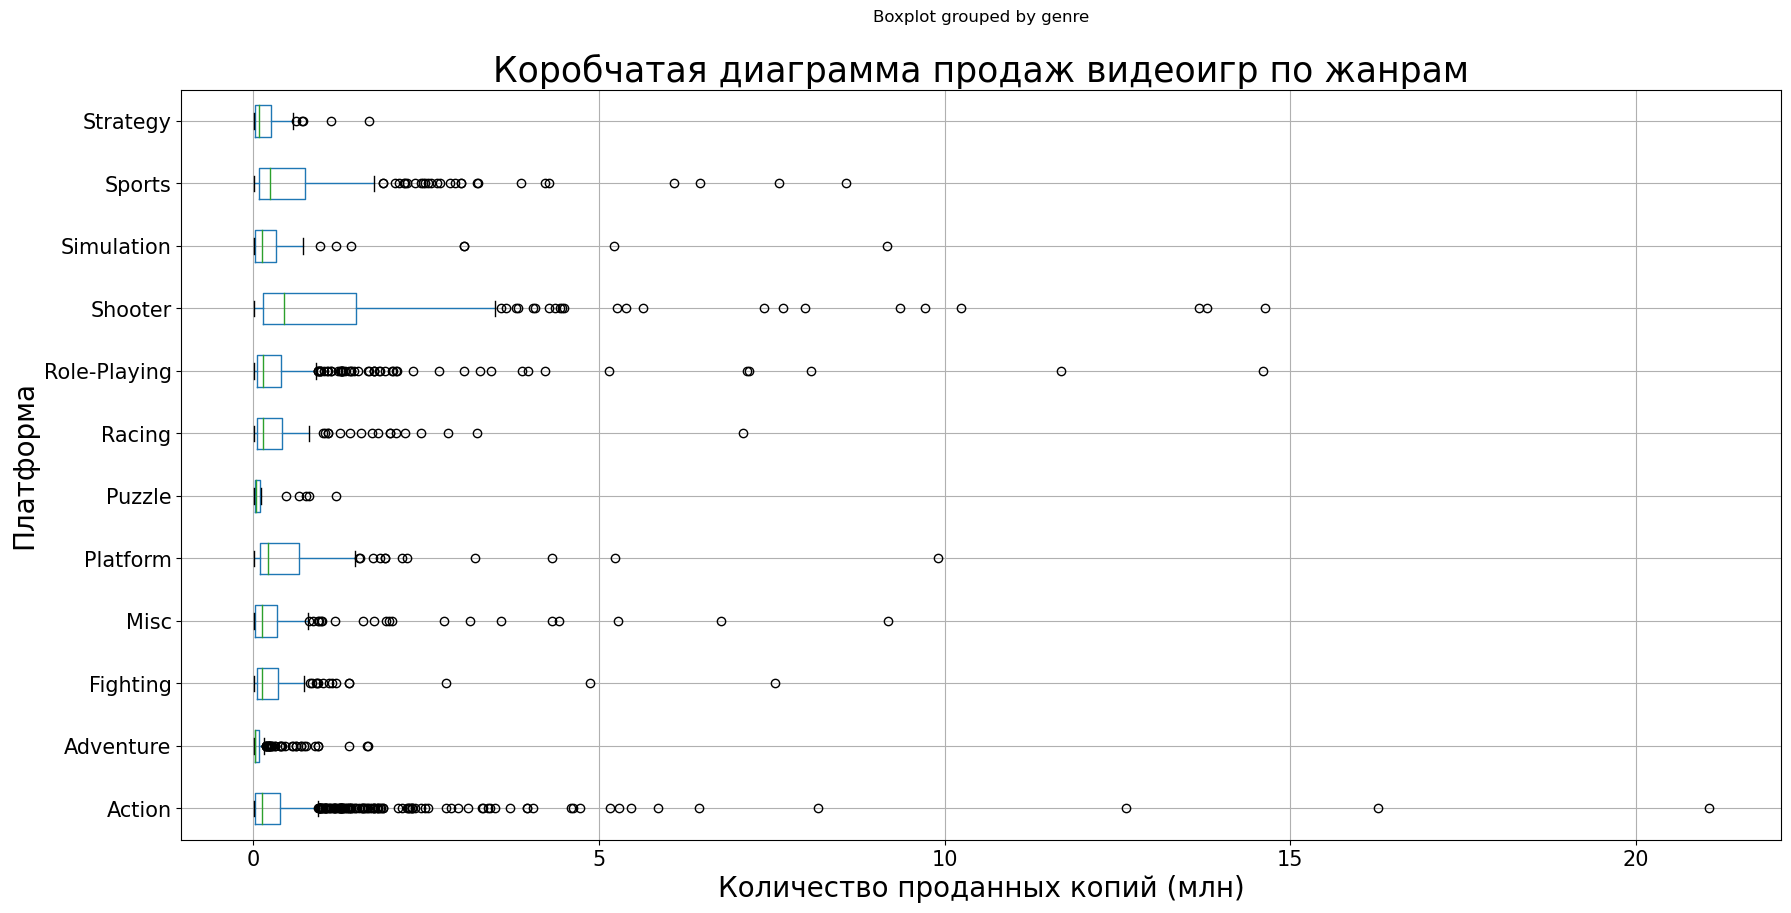

In [70]:
ax = df_actual.boxplot(column='total_sales', by='genre', vert=False, figsize=(20, 10), fontsize=15)
res = ax.set_title("Коробчатая диаграмма продаж видеоигр по жанрам", fontsize=25)
res = ax.set_xlabel("Количество проданных копий (млн)", fontsize=20)
res = ax.set_ylabel("Платформа", fontsize=20)

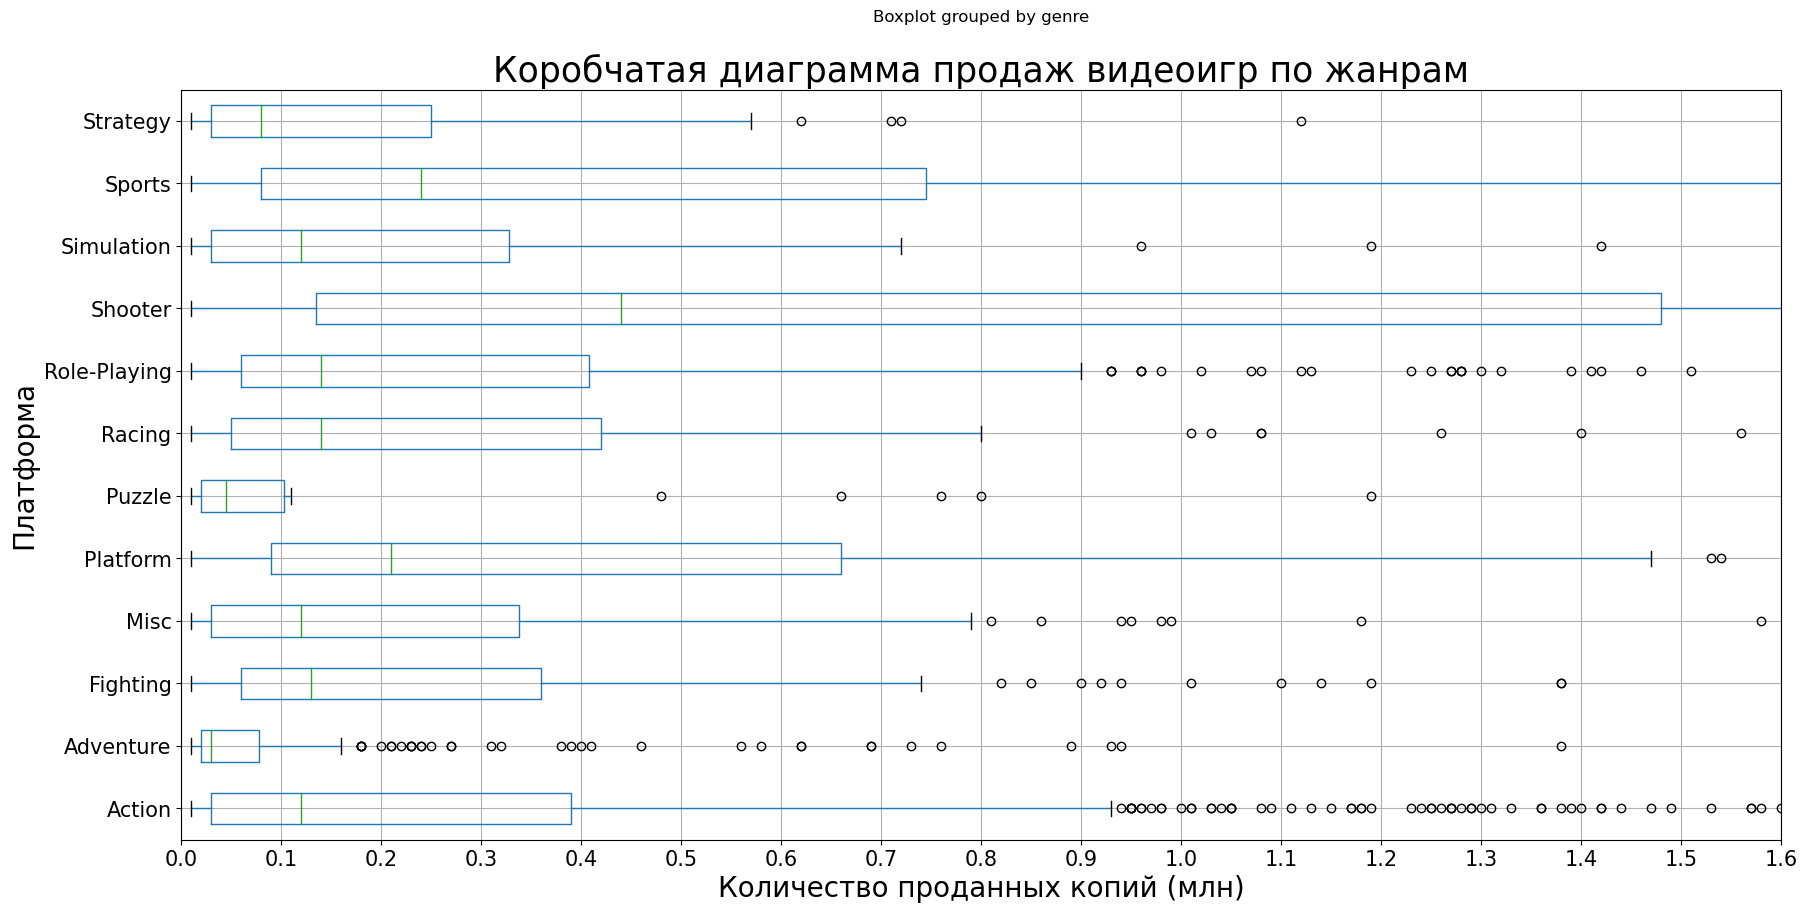

In [71]:
ax = df_actual.boxplot(column='total_sales', by='genre', vert=False, figsize=(20, 10), fontsize=15)
res = ax.set_xticks(np.arange(0.0, 1.7, 0.1, dtype=float))
res = ax.set_xlim(0, 1.6)
res = ax.set_title("Коробчатая диаграмма продаж видеоигр по жанрам", fontsize=25)
res = ax.set_xlabel("Количество проданных копий (млн)", fontsize=20)
res = ax.set_ylabel("Платформа", fontsize=20)

#### Рейтинг критиков видеоигр по жанрам

Ранее мы сделали вывод, что продажи сильно зависят от рейтингов от критиков.

Выведем средний рейтинг критиков по жанрам видеоигр, где мы видим, что:
- Оценка критиков не зависит от жанра;
- Оценка пользователей не зависит от жанра.

In [72]:
genre_critic_score = df_actual.groupby('genre').critic_score.mean()
genre_user_score = df_actual.groupby('genre').user_score.mean()
genre_total_sales = df_actual.groupby('genre').total_sales.mean()
genre_df = pd.concat([genre_critic_score, genre_user_score, genre_total_sales], axis=1)
genre_df = genre_df.sort_values(by='total_sales', ascending=False)
genre_df

,critic_score,user_score,total_sales
genre,,,
Shooter,73.421965,6.435897,1.296723
Platform,74.610169,6.806061,0.717647
Sports,72.823944,5.455670,0.678165
Role-Playing,73.049689,7.258480,0.521081
Racing,71.864198,6.151163,0.465217
Misc,72.807018,6.938806,0.442917
Simulation,66.615385,6.511905,0.439000
Action,71.378440,6.825048,0.427856
Fighting,70.406250,6.895714,0.408165


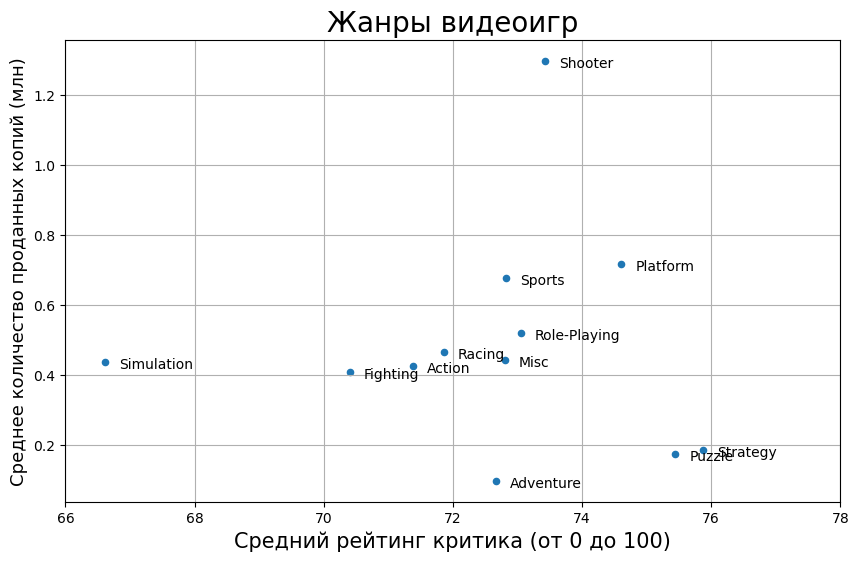

In [73]:
fig, ax = plt.subplots()
genre_df.plot.scatter(x='critic_score', y='total_sales', figsize=(10, 6), grid=True, ax=ax)

for idx, row in genre_df.iterrows():
    ax.annotate(idx, (row.critic_score, row.total_sales),  xytext=(10, -5),  textcoords='offset points')

    
res = ax.set_xlim(66, 78)
res = ax.set_title("Жанры видеоигр", fontsize=20)
res = ax.set_xlabel("Средний рейтинг критика (от 0 до 100)", fontsize=15)
res = ax.set_ylabel("Среднее количество проданных копий (млн)", fontsize=13)

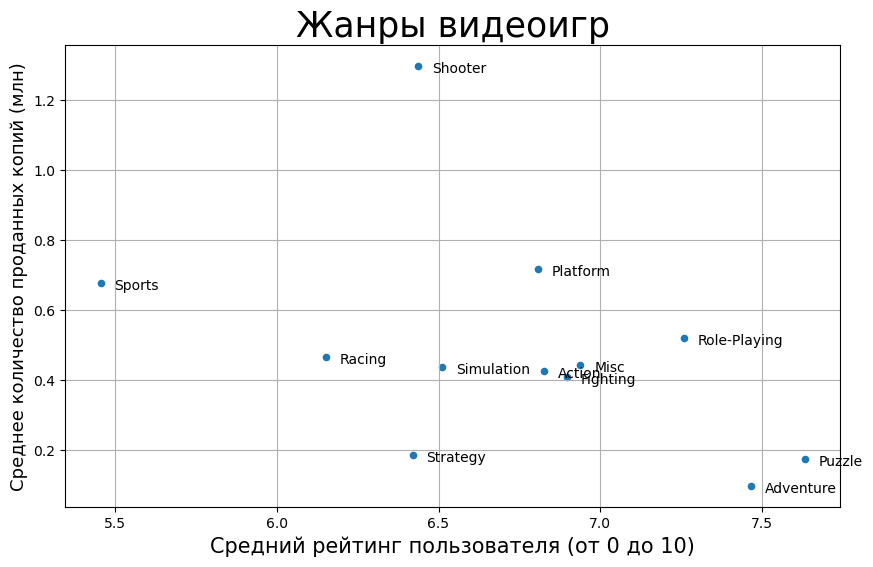

In [74]:
fig, ax = plt.subplots()
genre_df.plot.scatter(x='user_score', y='total_sales', figsize=(10, 6), grid=True, ax=ax)

for idx, row in genre_df.iterrows():
    ax.annotate(idx, (row.user_score, row.total_sales),  xytext=(10, -5),  textcoords='offset points')
    
res = ax.set_title("Жанры видеоигр", fontsize=25)
res = ax.set_xlabel("Средний рейтинг пользователя (от 0 до 10)", fontsize=15)
res = ax.set_ylabel("Среднее количество проданных копий (млн)", fontsize=13)

#### Рейтинг пользователей видеоигр по жанрам

Выведем средний рейтинг пользователей по жанрам, где мы увидим, что оценка пользователя не зависит от жанра.

Из таблиц можно подчеркнуть, что:
- Самой популярной игрой в жанре ***Shooter*** является ***Call of Duty***;
- Самыми популярными играми в жанре ***Sports*** являются ***FIFA, NBA 2K и Madden NFL***;
- Самой популярной игрой в жанре ***Platform*** является ***Super Mario***;

#### Анализ видеоигр самых прибыльных жанров

Ввыведем самые популярные игры жанра ***Shooter, Sport и Platform***.

In [75]:
def popular_games(genre):
    return pd.pivot_table(
        df_actual.query(f'genre == "{genre}"'),
        index = ['name', 'year_of_release'],
        values = ['platform', 'rating', 'critic_score', 'user_score', 'total_sales'],
        aggfunc = { 
            'platform': lambda x: ', '.join(x), 
            'rating': lambda x: ', '.join(set(x)), 
            'critic_score': 'max', 
            'user_score': 'max', 
            'total_sales': 'sum',
        }
    ).sort_values(by='total_sales', ascending=False).head(10)

In [76]:
popular_games("Shooter")

,,critic_score,platform,rating,total_sales,user_score
name,year_of_release,,,,,
Call of Duty: Black Ops II,2012,83.0,"PS3, X360, PC, WiiU",M,29.40,6.9
Call of Duty: Ghosts,2013,78.0,"X360, PS3, PS4, XOne, PC, WiiU","unknown, M",27.39,4.3
Call of Duty: Black Ops 3,2015,NaN,"PS4, XOne, X360, PS3, PC",unknown,25.67,NaN
Call of Duty: Advanced Warfare,2014,83.0,"PS4, XOne, PS3, X360, PC",M,21.97,5.7
Battlefield 4,2013,85.0,"PS4, PS3, X360, XOne, PC",M,13.94,6.9
Destiny,2014,76.0,"PS4, XOne, X360, PS3",T,12.54,6.1
Star Wars Battlefront (2015),2015,NaN,"PS4, XOne, PC",unknown,12.19,NaN
Halo 4,2012,87.0,X360,M,9.71,7.0
Far Cry 4,2014,85.0,"PS4, XOne, PS3, X360, PC",M,8.50,7.7


In [77]:
popular_games("Sports")

,,critic_score,platform,rating,total_sales,user_score
name,year_of_release,,,,,
FIFA 15,2014,82.0,"PS4, PS3, X360, XOne, PSV, Wii, 3DS, PC",E,17.37,5.7
FIFA 14,2013,88.0,"PS3, X360, PS4, XOne, PSV, PC, Wii, 3DS, PSP","unknown, E",16.46,6.3
FIFA 16,2015,84.0,"PS4, XOne, PS3, X360, PC",E,16.30,4.4
FIFA 17,2016,85.0,"PS4, XOne, PS3, X360, PC",E,11.48,5.5
NBA 2K16,2015,87.0,"PS4, XOne, X360, PS3, PC","E, E10+",7.98,6.7
Madden NFL 16,2015,84.0,"PS4, XOne, X360, PS3",E,7.40,6.1
Madden NFL 15,2014,81.0,"PS4, X360, XOne, PS3",E,7.26,6.4
NBA 2K15,2014,83.0,"PS4, XOne, X360, PS3",E,7.15,7.0
NBA 2K14,2013,87.0,"X360, PS3, PS4, XOne",E,6.97,6.5


In [78]:
popular_games("Platform")

,,critic_score,platform,rating,total_sales,user_score
name,year_of_release,,,,,
New Super Mario Bros. 2,2012,78.0,3DS,E,9.90,7.2
Skylanders SWAP Force,2013,89.0,"Wii, X360, PS3, WiiU, PS4, XOne, 3DS",E10+,6.00,6.6
New Super Mario Bros. U,2012,84.0,WiiU,E,5.23,8.1
Super Mario 3D World,2013,93.0,WiiU,E,4.32,9.0
Super Mario Maker,2015,88.0,WiiU,E,3.21,8.7
LEGO City Undercover,2013,80.0,"3DS, WiiU","unknown, E10+",2.57,8.2
LittleBigPlanet 3,2014,79.0,"PS4, PS3",E,2.55,7.2
New Super Luigi U,2013,77.0,WiiU,E,2.23,7.9
Donkey Kong Country Returns,2013,NaN,3DS,unknown,1.90,NaN


#### Анализ платформ самых прибыльных жанров

Выведем самые используемые платформы для популярных жанров и оценим их количеству проданных копий.

Из графиков можно выделить то, что:
- Самые используемые платформы для жанров ***Shooter, Sports*** являются консоли ***PS4, PS3, X360, XOne***;
- Самые используемые платформы для жанра ***Platform*** являются ПОРТАТИВНЫЕ консоли ***WiiU, 3DS***;

In [79]:
def popular_platforms(genre, sales, top):
    df_action_genre = df_actual.query(f'genre == "{genre}"')
    df_agg = pd.pivot_table(
        df_action_genre,
        index = ['platform'],
        values = ['critic_score', 'user_score', sales],
        aggfunc = { 
            'critic_score': 'max', 
            'user_score': 'max', 
            sales: 'sum',
        }
    ).sort_values(by=sales, ascending=False).head(7)
    perc_column = f'{sales}_perc'
    df_agg[perc_column] = 100 * df_action_genre.groupby('platform')[sales].sum() / df_action_genre[sales].sum()
    df_agg[perc_column] = df_agg[perc_column].round(1)
    df_agg = df_agg.sort_values(by=sales, ascending=False)
    
    others = df_agg[top:]
    data_others = {
        'index': ['Others'], 
        'critic_score': [others.critic_score.mean()],
        'user_score': [others.user_score.mean()],
        sales: [others[sales].sum()], 
        perc_column: [others[perc_column].sum()],
    }
    df_other = pd.DataFrame(data_others)
    df_other.set_index('index', inplace=True) 
   
    return pd.concat([df_agg[:top], df_other])

In [80]:
def popular_platforms_plot_pie(df, genre, sales):
    ax = df.plot.pie(y=sales, figsize=(5, 5), legend=False, autopct='%1.1f%%')
    res = ax.set_title(f'Лидеры платформ по продаж в жанре {genre}\n(столбец {sales})')

In [81]:
def platform_info(genre, sales, top=7):
    df = popular_platforms(genre, sales, top)
    popular_platforms_plot_pie(df, genre, sales)
    return df

,critic_score,total_sales,user_score,total_sales_perc
PS4,93.0,88.56,8.5,29.1
X360,93.0,72.70,8.6,23.9
PS3,94.0,60.39,8.5,19.8
XOne,91.0,60.33,8.3,19.8
PC,94.0,14.27,8.5,4.7
Others,79.5,8.35,8.7,2.8


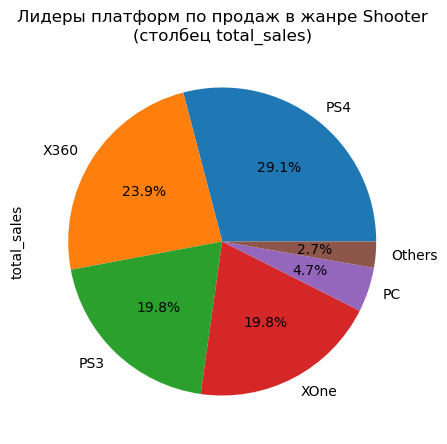

In [82]:
platform_info("Shooter", 'total_sales', 5)

,critic_score,total_sales,user_score,total_sales_perc
PS4,88.000000,55.61,8.7,30.7
PS3,90.000000,44.84,8.2,24.8
X360,88.000000,36.39,8.0,20.1
XOne,90.000000,26.74,8.3,14.8
Others,82.333333,10.70,8.4,5.9


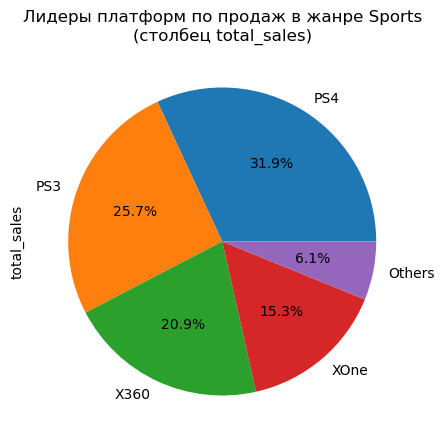

In [83]:
platform_info("Sports", 'total_sales', 4)

,critic_score,total_sales,user_score,total_sales_perc
WiiU,93.0,21.53,9.0,35.3
3DS,90.0,19.11,8.8,31.3
PS4,90.0,7.69,8.5,12.6
PS3,91.0,4.26,8.7,7.0
PSV,88.0,2.26,8.6,3.7
Others,90.0,4.39,7.4,7.2


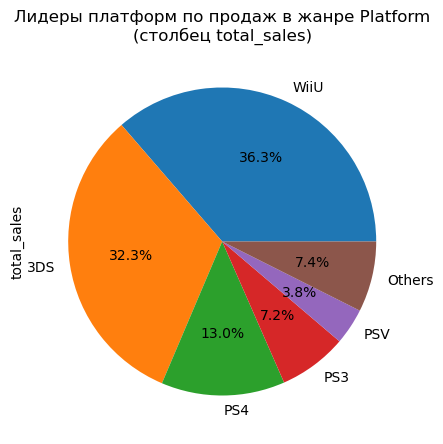

In [84]:
platform_info("Platform", 'total_sales', 5)

***Вывод:***
- Самые успешные жанры видеоигр по продажам, выпущенные с 2012 года: ***Shooter, Sports, Platform***;
- Самые неуспешные жанры по продажам, выпущенные с 2012 года: ***Adventure, Puzzle, Strategy***;
- Оценка критиков не зависит от жанра;
- Оценка пользователей не зависит от жанра;
- Самой популярной игрой в жанре ***Shooter*** является ***Call of Duty***;
- Самыми популярными играми в жанре ***Sports*** являются ***FIFA, NBA 2K и Madden NFL***;
- Самой популярной игрой в жанре ***Platform*** является ***Super Mario***;
- Самые используемые платформы для жанров ***Shooter, Sports*** являются консоли ***PS4, PS3, X360, XOne***;
- Самые используемые платформы для жанра ***Platform*** являются ПОРТАТИВНЫЕ консоли ***WiiU, 3DS***;

## Портрет пользователя каждого региона (NA, EU, JP)

###  Самые популярные платформы по регионам (топ-5)

In [85]:
def popular_platforms(sales, top):
    df_sales = df_actual.groupby('platform')[sales].sum()
    df_perc = 100 * df_sales / df_actual[sales].sum()
    df_perc = df_perc.round(1)
    df_perc.name='percent'
    df = pd.concat([df_sales, df_perc], axis=1).sort_values(by=sales, ascending=False)
    
    others = df[top:].sum()
    data_others = {'index': ['Others'], sales: [others.iloc[0]], 'percent': [others.iloc[1]]}
    df_other = pd.DataFrame(data_others)
    df_other.set_index('index', inplace=True) 
   
    return pd.concat([df[:top], df_other])

In [86]:
def popular_platforms_plot_pie(df, sales):
    ax = df.plot.pie(y=sales, figsize=(5, 5), legend=False, autopct='%1.1f%%')
    res = ax.set_title(f'Лидеры платвоформ по продажам копий (млн)\n(столбец {sales})')

In [87]:
def popular_platforms_info(sales, top):
    df = popular_platforms(sales, top)
    popular_platforms_plot_pie(df, sales)
    return df

####  Популярные платформы в Северной Америке

,na_sales,percent
X360,140.05,23.7
PS4,108.74,18.4
PS3,103.38,17.5
XOne,93.12,15.8
3DS,55.31,9.4
Others,90.37,15.3


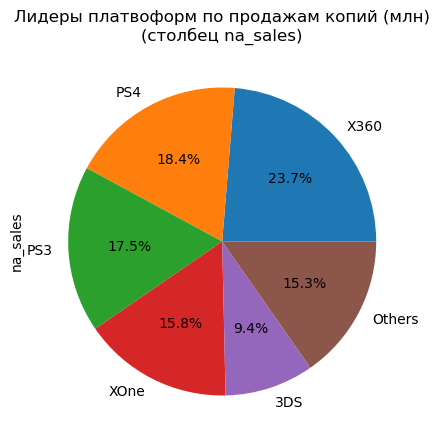

In [88]:
popular_platforms_info('na_sales', 5)

#### Популярные платформы в Европе

,eu_sales,percent
PS4,141.09,27.8
PS3,106.86,21.1
X360,74.52,14.7
XOne,51.59,10.2
3DS,42.64,8.4
Others,90.12,17.9


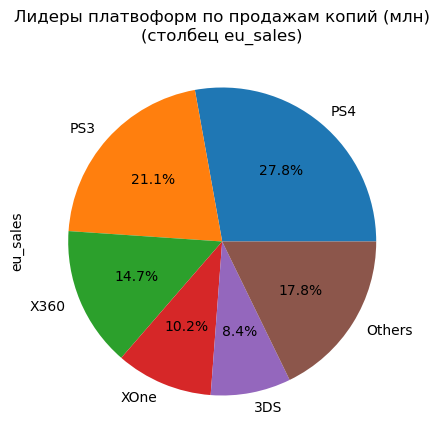

In [89]:
popular_platforms_info('eu_sales', 5)

#### Популярные платформы в Японии

,jp_sales,percent
3DS,87.79,45.6
PS3,35.29,18.3
PSV,21.04,10.9
PS4,15.96,8.3
WiiU,13.01,6.8
Others,19.49,10.1


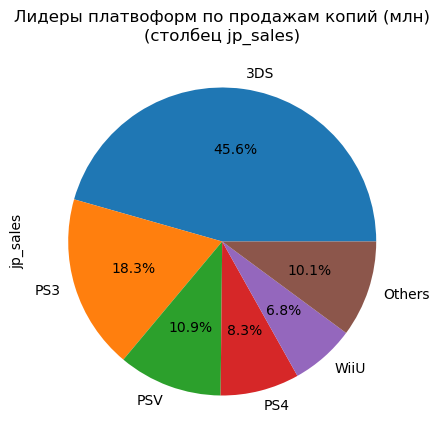

In [90]:
popular_platforms_info('jp_sales', 5)

***Вывод:***
<br>
- В Северной Америке и Европе популярны платформы ***PS4, PS3, X360, XOne и 3DS***;
- В Японии популярны платформы ***PS4, PS3, PSV, 3DS и WiiU***.

### Самые популярные жанры в регионах (топ-5)

In [91]:
def popular_genres(sales, top):
    df_sales = df_actual.groupby('genre')[sales].sum()
    df_perc = 100 * df_sales / df_actual[sales].sum()
    df_perc = df_perc.round(1)
    df_perc.name='percent'
    df = pd.concat([df_sales, df_perc], axis=1).sort_values(by=sales, ascending=False)
    
    others = df[top:].sum()
    data_others = {'index': ['Others'], sales: [others.iloc[0]], 'percent': [others.iloc[1]]}
    df_other = pd.DataFrame(data_others)
    df_other.set_index('index', inplace=True) 
   
    return pd.concat([df[:top], df_other])

In [92]:
def popular_genres_plot_pie(df, sales):
    ax = df.plot.pie(y=sales, figsize=(5, 5), legend=False, autopct='%1.1f%%')
    res = ax.set_title(f'Лидеры жанров по продажам копий (млн)\n(столбец {sales})')

In [93]:
def popular_genres_info(sales, top):
    df = popular_genres(sales, top)
    popular_genres_plot_pie(df, sales)
    return df

#### Популярные жанры в Северной Америке

,na_sales,percent
Action,177.84,30.1
Shooter,144.77,24.5
Sports,81.53,13.8
Role-Playing,64.00,10.8
Misc,38.19,6.5
Others,84.64,14.2


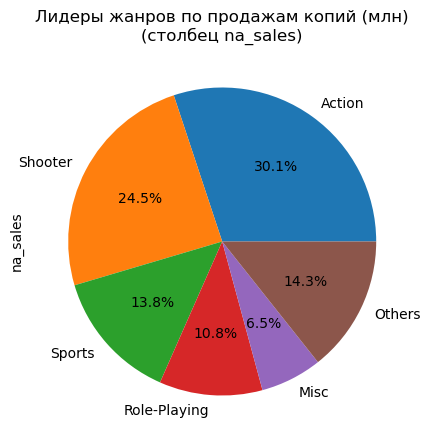

In [94]:
popular_genres_info('na_sales', 5)

#### Популярные жанры в Европе

,eu_sales,percent
Action,159.34,31.4
Shooter,113.47,22.4
Sports,69.09,13.6
Role-Playing,48.53,9.6
Racing,27.29,5.4
Others,89.10,17.6


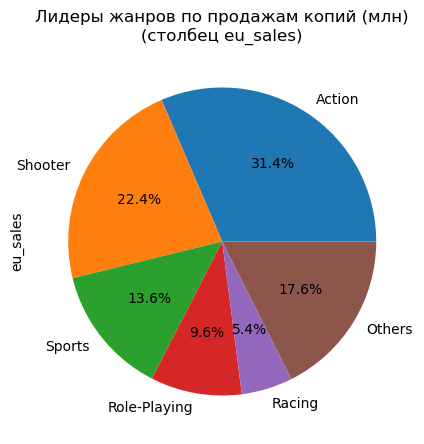

In [95]:
popular_genres_info('eu_sales', 5)

#### Популярные жанры в Японии

,jp_sales,percent
Role-Playing,65.44,34.0
Action,52.80,27.4
Misc,12.86,6.7
Simulation,10.41,5.4
Fighting,9.44,4.9
Others,41.63,21.7


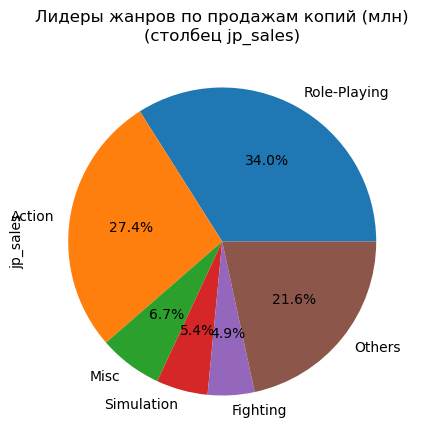

In [96]:
popular_genres_info('jp_sales', 5)

***Вывод:***
<br>
- В Северной Америке популярны жанры ***Action, Shooter, Sports, Role-Playing, Misc***;
- В Европе популярны жанры ***Action, Shooter, Sports, Role-Playing, Racing***;
- В Японии популярны платформы ***Role-Playing, Action, Misc, Simulation и Fighting***.

### Влияние рейтинга ESRB по регионам

#### Продажи видеоигр по рейтингам в регионах

Рейтинг определяет возрастное ограничение для пользователей. Выведем самые используемые рейтинги.

| Рейтинг | Возраст | Описание | Примеры игр |
| :-: | :-: | :--- | :--- |
| E | 0+  |  Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. | Просто таннцуй, FIFA. | 
| E 10+ | 10+  | Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. | Minecraft Dungeons, Растения против зомби. | 
| T | 13+  | Игра может содержать более реалистичные и натуралистические сцены насилия. | Fortnite, Sims 4. |
| M | 17+ | Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. | Ark: Survival Evolved, Destiny 2. |

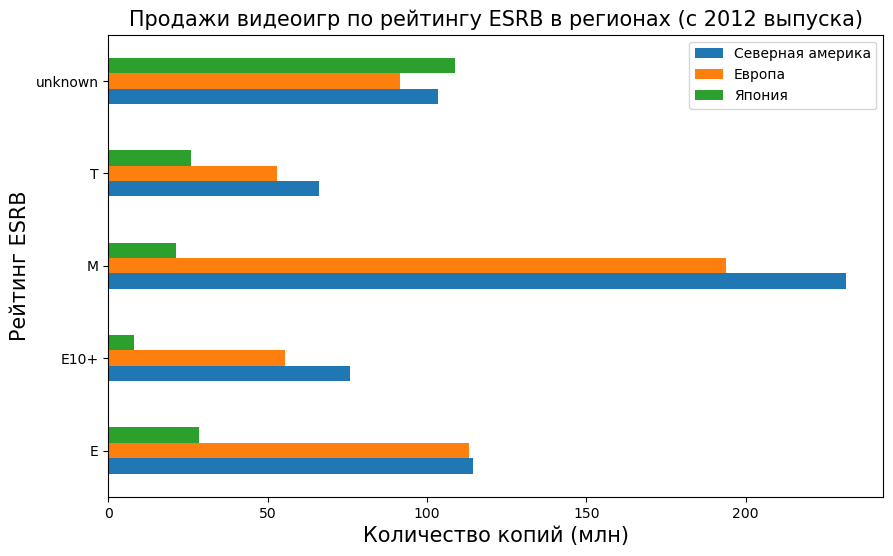

In [97]:
df = df_actual.groupby('rating').sum()
ax = df[['na_sales', 'eu_sales', 'jp_sales']].plot.barh(figsize=(10, 6), rot=0)
res = ax.set_title("Продажи видеоигр по рейтингу ESRB в регионах (с 2012 выпуска)", fontsize=15)
res = ax.set_ylabel("Рейтинг ESRB", fontsize=15)
res = ax.set_xlabel("Количество копий (млн)", fontsize=15)
res = ax.legend(["Северная америка", "Европа", "Япония"]);

***Вывод:***
- Рейтинг ESRB раздается в осном для видеоигр из США и Канады. Исходя из этого последующие выводы по рейтингам будут сделаны с учетом того, что эти игры выпущены в в этих странах;
- Пользователи из Северной Америки и Европы больше предпочитают игры с рейтингом ***M 17++***, во вторую очередь игры с рейтингом ***Е 0+***; 
- Пользователи из Японии меньше восприниают реалистичные сцены насилия и больше предпочитают игры с рейтингом ***T 13+*** и ***Е 0+***;
- Пользователи из Японии больше предпочитают игры не из США и Канады.


#### Взаимосвязь рейтинга ESRB и жанра

Выведем количество выпущенных игр по каждому жанру и рейтингу ESRB в отдельную таблицу.

Из него мы видим:
- Больше всего выпущено игр в жанре ***Action*** с рейтингом ***E10+, T (13+) и M (17+)***;
- Выпущено больше колтчество игр выпущено в жанре ***Shooter*** c рейтингом ***M (17+)***, что логично для жанра шутера;
- Выпущено больше колтчество игр выпущено в жанре ***Sports*** c рейтингом ***E***, что логично для жанра шутера;
- Выпущено больше колтчество игр выпущено в жанре ***Role-Playing*** c рейтингом ***T (13+)***, что логично для жанра шутера;

Именно зависимость рейтига от жанров и жанровые предпочтений пользователей в тех или иных регионах и определяется количеством выпущенных игр с этипо показателями. 

Логичено, что в спортивной игре ***FIFA***, не требуется никаких сцен насилия, поэтому у этой серии игр нет возрвстных ограничений.
В играх жанра шутер (например, ***Call of Duty***) обосновано стоят рейтинги ***M (17+)***, поскольку там много насилия становится реалистичным и похожим на реальную жизнь. 


In [98]:
df = pd.pivot_table(
    df_actual,
    index = 'genre',
    columns = 'rating',
    values = 'total_sales',
    aggfunc = 'count',
    fill_value=0.0,
)
df = df.drop(['unknown'], axis=1)
df = df.round(1)
df = df[['E', 'E10+', 'T', 'M']]
df.style.format("{:20d}").background_gradient()

rating,E,E10+,T,M
genre,,,,
Action,73,130,138,215
Adventure,4,19,14,31
Fighting,0,3,57,11
Misc,21,40,19,5
Platform,28,40,5,0
Puzzle,9,6,1,0
Racing,62,14,10,2
Role-Playing,5,12,86,70
Shooter,0,16,27,158


Изучим каждый регион на количество продажных копий по рейтингу и жанру в каждом регионе.

#### Продажи видеоигр в Северной Америке по жанрам и рейтингу

Пользователи в Северной Америке больше предпочитают:
- Видеоигры в жанре ***Acttion и Шутеры*** с рейтингом ***M (17+)***.
- Видеоигры в жанре ***Sport*** с рейтингом ***E***.

Данные наблюдения пожверждают исследования раннее (из пунткта 4.3.1);

In [99]:
def genre_platform_sales(sales):
    df = pd.pivot_table(
        df_actual,
        index = 'genre',
        columns = 'rating',
        values = sales,
        aggfunc = 'sum',
        fill_value=0.0,
    )
    df = df.drop(['unknown'], axis=1)
    df = df[['E', 'E10+', 'T', 'M']]
    df = df.round(1)
    return df.style.format("{:20.1f}").background_gradient(axis=None)


In [100]:
genre_platform_sales('na_sales')

rating,E,E10+,T,M
genre,,,,
Action,12.5,31.9,18.1,92.7
Adventure,0.7,0.9,0.3,3.0
Fighting,0.0,0.6,8.4,3.5
Misc,4.0,16.6,2.9,0.8
Platform,15.0,7.2,0.2,0.0
Puzzle,0.7,0.2,0.2,0.0
Racing,8.9,3.3,2.2,0.1
Role-Playing,2.8,1.5,8.9,24.7
Shooter,0.0,3.6,15.8,105.5


#### Продажи видеоигр в Европе по жанрам и рейтингу

Пользователи в Европе также как и в Северной Америке больше предпочитают:
- Видеоигры в жанре ***Acttion и Шутеры*** с рейтингом ***M (17+)***.
- Видеоигры в жанре ***Sport*** с рейтингом ***E***.

Данные наблюдения пожверждают исследования раннее (из пунткта 4.3.1);

In [101]:
genre_platform_sales('eu_sales')

rating,E,E10+,T,M
genre,,,,
Action,16.4,25.0,14.8,83.3
Adventure,0.8,1.1,0.3,3.5
Fighting,0.0,0.3,5.7,1.4
Misc,4.1,9.2,1.3,0.5
Platform,11.7,6.4,0.3,0.0
Puzzle,0.4,0.5,0.3,0.0
Racing,13.6,4.3,3.6,0.0
Role-Playing,1.2,0.9,5.6,22.1
Shooter,0.0,3.1,11.0,82.1


#### Продажи видеоигр в Японии по жанрам и рейтингу

У пользователей из Японии если несколько предпочтений:
- Больше всего играют в жанре ***Role-Playing*** с рейтингом ***T***;
- Больше всего играют в жанре ***Action*** с рейтингом ***M и Т***;
- Видеоигры в жанре ***Platform*** с рейтингом ***E***;
- Видеоигры в жанре ***Simulation*** с рейтингом ***E***;

Данное разнообразие среди японцев и отражается в иследовании ранее (из пунткта 4.3.1);

In [102]:
genre_platform_sales('jp_sales')

rating,E,E10+,T,M
genre,,,,
Action,4.0,2.1,7.0,10.3
Adventure,0.5,0.0,0.1,0.4
Fighting,0.0,0.2,3.4,0.6
Misc,2.7,0.7,1.1,0.2
Platform,7.2,0.8,0.0,0.0
Puzzle,0.3,0.2,0.3,0.0
Racing,1.9,0.1,0.1,0.0
Role-Playing,1.9,1.7,12.6,3.8
Shooter,0.0,1.6,0.8,5.7


### Вывод
1. <u>Самые популярные платформы по регионам</u> (c 2012 года)

     1. В Северной Америке и Европе популярны платформы ***PS4, PS3, X360, XOne и 3DS***;
     2. В Японии популярны платформы ***PS4, PS3, PSV, 3DS и WiiU***.
   
     (PS. Портативная консоль ***WiiU*** является платформой от японской компании ***Nintendo***, что обусловывет использование внутри страны);
<br>  

2. <u>Самые популярные жанры по регионам</u> (c 2012 года)
    1. ***Североамериканские пользователи*** больше всего играют в жанрах ***Action, Shooter, Sports, Role-Playing и Misc***:
| Платформа | Количество проданных копий | Доля% |
| :-- | :-: | :-: |
|Action	|177.84	|30.1|
|Shooter	|144.77	|24.5|
|Sports	|81.53	|13.8|
|Role-Playing	|64.00	|10.8|
|Misc	|38.19	|6.5|
|Others	|84.64	|14.2|
    2. ***Европейские  пользователи*** больше всего играют в жанрах  ***Action, Shooter, Sports, Role-Playing и Racing:***:
| Платформа | Количество проданных копий | Доля% |
| :-- | :-: | :-: |
|Action	|159.34	|31.4|
|Shooter	|113.47	|22.4|
|Sports	|69.09	|13.6|
|Role-Playing	|48.53	|9.6|
|Racing	|27.29	|5.4|
|Others	|89.10	|17.6|
    3. ***Японские пользователи*** больше всего играют в жанрах  ***Role-Playing, Action, Misc, Simulation, Fighting***
  
| Платформа | Количество проданных копий | Доля% |
| :-- | :-: | :-: |
|Role-Playing	|65.44	|34.0|
|Action	|52.80	|27.4|
|Misc	|12.86	|6.7|
|Simulation	|10.41	|5.4|
|Fighting	|9.44	|4.9|
|Others	|41.63	|21.7|

3. <u>Влияние рейтинга ESRB по регионам</u>

    1. По данным продаж копий видеоигр по рейтингу можно сделать вывод, что:
        - Рейтинг ESRB раздается в осном для видеоигр из США и Канады. Исходя из этого последующие выводы по рейтингам будут сделаны с учетом того, что эти игры выпущены в в этих странах;
        - Пользователи из Северной Америки и Европы больше предпочитают игры с рейтингом ***M 17++***, во вторую очередь игры с рейтингом ***Е 0+***; 
        - Пользователи из Японии меньше восприниают реалистичные сцены насилия и больше предпочитают игры с рейтингом ***T 13+*** и ***Е 0+***;
        - Пользователи из Японии больше предпочитают игры не из Северной Америки.
<br><br>
    2. По данным исследование продаж копий по рейтингам и жанрам видеоигр можно сделать вывод, что с 2012 года:
        1.  <i>Североамериканские и Европейские пользователи</i> больше всего играют видеоигры:
            - в жанре ***Acttion и Шутеры*** с рейтингом ***M (17+)***.
            - в жанре ***Sport*** с рейтингом ***E***.
        2. <i>Японские пользователи</i> играют видеоигры:
            - В жанре ***Role-Playing*** с рейтингом ***T***;
            - В жанре ***Action*** с рейтингом ***M и Т***;
            - В жанре ***Platform*** с рейтингом ***E***;
            - В жанре ***Simulation*** с рейтингом ***E***;
        3. Зависимость рейтига от жанров и жанровые предпочтений пользователей в тех или иных регионах и определяется количеством выпущенных игр с этипо показателями.
            - Логичено, что в спортивной игре ***FIFA***, не требуется никаких сцен насилия, поэтому у этой серии игр нет возрвстных ограничений.
            - В играх жанра шутер (например, ***Call of Duty***) обосновано стоят рейтинги ***M (17+)***, поскольку там много насилия становится реалистичным и похожим на реальную жизнь. 



## Статистический анализ данных

### Сравнение средних пользовательские рейтингов платформ Xbox One и PC

Сравним средние пользовательские рейтинги видеоигр и узнаем, для какого из платформе  ***XOne и PC*** пользователи оценивают работу создателей игр выше.

На первый взгляд средний рейтинг игр на PC выше, однако нужно проверить является ли разница средних значениях существенной.

In [103]:
df_xone = df_actual.query('platform == "XOne"').user_score
df_xone = df_xone[~df_xone.isna()]
df_xone.describe()[['count', 'mean', 'std']]

count    182.000000
mean       6.521429
std        1.380941
Name: user_score, dtype: float64

In [104]:
df_pc = df_actual.query('platform == "PC"').user_score
df_pc = df_pc[~df_pc.isna()]
df_pc.describe()[['count', 'mean', 'std']]

count    206.000000
mean       6.428641
std        1.664465
Name: user_score, dtype: float64

Составим гипотезу о равенстве средних польовательских оценках с двухсторонней альтернативной гипотезой. Количество записей позовляет отсуществить проверку гипотезы.

Значения среднеквартичных отклонений различаются примерно на `0.28`, что не является существенной. Поэтому для метода 
`st.ttest_ind` установим значение флага `equal_var=True`.

<u>Гипотеза:</u>
<br><i>H0</i>: Средние пользовательские рейтинги для платформ ***XOne и PC*** не отличаются;
<br><i>H1</i>: Средние пользовательские рейтинги для платформ ***XOne и PC*** отличаются;

Критерием успеха будет являтся сравнение ***p-value*** значения с заданным уровнем значимости `alpha = 0.01`.
Если значение ***p-value*** будет выше ***alpha***, то оснований отвергать нулевую гипотезу не будет. 

In [105]:
alpha = 0.01 # заданный уровень значимости
results = st.ttest_ind(df_xone, df_pc, equal_var=True)
print(f'p-value: {results.pvalue}\n')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу:')
    print('Средние пользовательские рейтинги для платформ XOne и PC отличаются.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу:')
    print('Средние пользовательские рейтинги для платформ XOne и PC не отличаются.')

p-value: 0.5535080500643661

Нет оснований отвергнуть нулевую гипотезу:
Средние пользовательские рейтинги для платформ XOne и PC не отличаются.


***Вывод:***
<br> По проверенной гипотизе средние пользовательские рейтинги для платформ ***XOne и PC*** не отличаются.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Сравним средние пользовательские рейтинги видеоигр и узнаем, для какого из жанров  ***Action и Sports*** пользователи оценивают работу создателей игр выше.

На первый взгляд средний рейтинг игр на ***Action*** выше, однако нужно проверить является ли разница средних значениях существенной.

In [106]:
df_action = df_actual.query('genre == "Action"').user_score
df_action = df_action[~df_action.isna()]
df_action.describe()[['count', 'mean', 'std']]

count    523.000000
mean       6.825048
std        1.374440
Name: user_score, dtype: float64

In [107]:
df_sports = df_actual.query('genre == "Sports"').user_score
df_sports = df_sports[~df_sports.isna()]
df_sports.describe()[['count', 'mean', 'std']]

count    194.000000
mean       5.455670
std        1.743142
Name: user_score, dtype: float64

Составим гипотезу о равенстве средних польовательских оценках с двухсторонней альтернативной гипотезой. Количество записей позовляет отсуществить проверку гипотезы.

<u>Гипотеза:</u>
<br><i>H0</i>: Средние пользовательские рейтинги для жанров ***Action и Sports*** не отличаются;
<br><i>H1</i>: Средние пользовательские рейтинги для жанров ***Action и Sports*** отличаются;

Значения среднеквартичных отклонений различаются примерно на `0.19`, что не является существенной. Поэтому для метода 
`st.ttest_ind` установим значение флага `equal_var=True`.

Критерием успеха будет являтся сравнение ***p-value*** значения с заданным уровнем значимости `alpha = 0.01`.
Если значение ***p-value*** будет выше ***alpha***, то оснований отвергать нулевую гипотезу не будет. 

In [108]:
alpha = 0.01 # заданный уровень значимости
results = st.ttest_ind(df_action, df_sports, equal_var=True)
print(f'p-value: {results.pvalue}\n')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу:')
    print('Средние пользовательские рейтинги для жанров Action и Sports отличаются.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу:')
    print('Средние пользовательские рейтинги для жанров Action и Sports не отличаются.')

p-value: 4.8045233804629176e-26

Отвергаем нулевую гипотезу:
Средние пользовательские рейтинги для жанров Action и Sports отличаются.


***Вывод:***
<br> По проверенной гипотизе средние пользовательские рейтинги для жанров ***Action и Sports*** отличаются.

## Общий вывод
***I. ЗАГРУЗГА ДАННЫХ И ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ***

По предварительному просмотру данных датасета были сделаны следующие выводы:
1. В датастете `data` найдено 16715 записей;
2. Необходимо перевести все названия столбцов в нижний регистр;
3. Столбец года выпуска `Year_of_Release` нужно перевести в целочисленный тип;
4. Необходимо выяснить, почему столбец `User_Score` имеет тип `object` и перевести в вещественный тип `float`;
5. Необходимо проаналиировать и обработать пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`;
6. Провести поиск дубликатов;
7. Необходимо создать столбец продаж во всем мире (сумма продаж в столбцах `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`).

***II. ПРЕДОБРАБОТКА ДАННЫХ***

В ходе предобработки данных были проведены работы:
1. Замена названий столбцов датасета (перевод в нижний регистр);
2. Изменение типа столбца `year_of_release` в целочисленный тип `Int32`;
3. Изменение типа столбца `user_score` в вещественный тип `float`;
4. Анализ и обработка пропусков;
5. Поиск и обработка дубликатов;
6. Создан столбец общих продаж видеоигр.

***III. ИCCЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ***
1. <u>Видеоигры, выпущенные до 1993 года были отфильтрованы.</u> 
    - Доля игр, выпущеных в до 1993 года включительно составляет 2.2% от общего числа игр и неочень полезны для анализа и прогноза на 2017 год, поскольку они предназначены для старых платформ 80-х годов. 

2. <u>Актуальность платформ</u>
    - Платформа может быть актуальна примерно максимум ***до 11 лет*** на рынке, после чего она становится невостребованной из-за устаревания. Персональные компьютеры ***PC*** являются исключениями, поскольку они будут актуальны всегда.
    - Несмотря на большое количество проданных копий для этих платформ, можно сказать, что они прошли свой пик продаж и на них нельзя сделать ставку на следующий 2017 год;
    - Виден спад для всех платформ за 2016 год даже для PS4. Это может быть обсуловлено тем, что игры выпущенные за последний год еще не исчерпали потенциал и число проданных копий может еще увеличиться в следующем году, что войдет в статустику за этот год.
    
3. <u>Актуальность платформ за актуальный период (последние 5 лет)</u>
    - Виден спад для всех платформ за 2016 год даже для PS4. Это может быть обсуловлено тем, что игры выпущенные за последний год еще не исчерпали потенциал и число проданных копий может еще увеличиться в следующем году, что войдет в статустику за этот год;
    - Наиболее актуальными платформами для видеоигр являются ***PS4*** и ***XOne***, поскольку они за 2015 год видно увеличение продаж количества копий для этих двух.

4. <u>Анализ продаж видеоигр по платформам</u>
    - Более ***25%*** игр (смотреть третью квартиь Q3) на платформах ***PS4, PS3, XOne, X360, WiiU*** продавались в размере более ***500*** тысяч копий;
    - Более ***50%*** игр (смотреть третью медтиану Q2) на тех же платформах продавались в размере более ***200*** тысяч копий.
    
5. <u>Анализ продаж видеоигр на платформаме ***PS4***</u>
    - Существует связь между оценкой критиков и суммой продаж. Чтобы иметь шансы на большое количество продаж, необходимо обязательно иметь оценку критика не менее 70 из 100.
    - Оценка пользователя не влияет на продажи. Дажи при низком рейтинге можно выпустить успешную игру.
    
6. <u>Анализ продаж видеоигр на  других платформамах</u>
    - Существует связь между оценкой критиков и суммой продаж для других платформ. Чем выше рейтинг критика, тем больше можно надеятся на большое количество проданных копий.
    - Существует связь между оценкой пользователей и суммой продаж для платформ ***WiiU*** и ***3DS***. Чем выше рейтинг пользователей видеоигр на этих платформах, тем больше шансов на хорошие продажи видеоигр;
    - Можно сказать, что выводы по взаимосвязи рейтингов критиков и пользователей и количеством проданных копий на ***PS4*** схожи с другими платформами. Исключением являются <i>ПОРТАТИВНЫЕ</i> платформы ***WiiU*** и ***3DS***, где существует связь между рейтингом пользователей с продажами.

7. <u>Анализ жанров видеоигр</u>
    - Самые успешные жанры видеоигр по продажам, выпущенные с 2012 года: ***Shooter, Sports, Platform***;
    - Самые неуспешные жанры по продажам, выпущенные с 2012 года: ***Adventure, Puzzle, Strategy***;
    - Оценка критиков не зависит от жанра;
    - Оценка пользователей не зависит от жанра;
    - Самой популярной игрой в жанре ***Shooter*** является ***Call of Duty***;
    - Самыми популярными играми в жанре ***Sports*** являются ***FIFA, NBA 2K и Madden NFL***;
    - Самой популярной игрой в жанре ***Platform*** является ***Super Mario***;
    - Самые используемые платформы для жанров ***Shooter, Sports*** являются консоли ***PS4, PS3, X360, XOne***;
    - Самые используемые платформы для жанра ***Platform*** являются ПОРТАТИВНЫЕ консоли ***WiiU, 3DS***;
    
***IV. ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ ПО РЕГИОНАМ (NA, EU, JP)***

1. <u>Самые популярные платформы по регионам</u> (c 2012 года)

     1. В Северной Америке и Европе популярны платформы ***PS4, PS3, X360, XOne и 3DS***;
     2. В Японии популярны платформы ***PS4, PS3, PSV, 3DS и WiiU***.
   
     (PS. Портативная консоль ***WiiU*** является платформой от японской компании ***Nintendo***, что обусловывет использование внутри страны);
<br>  

2. <u>Самые популярные жанры по регионам</u> (c 2012 года)
    1. ***Североамериканские пользователи*** больше всего играют в жанрах ***Action, Shooter, Sports, Role-Playing и Misc***:
| Платформа | Количество проданных копий | Доля% |
| :-- | :-: | :-: |
|Action	|177.84	|30.1|
|Shooter	|144.77	|24.5|
|Sports	|81.53	|13.8|
|Role-Playing	|64.00	|10.8|
|Misc	|38.19	|6.5|
|Others	|84.64	|14.2|
    2. ***Европейские  пользователи*** больше всего играют в жанрах  ***Action, Shooter, Sports, Role-Playing и Racing:***:
| Платформа | Количество проданных копий | Доля% |
| :-- | :-: | :-: |
|Action	|159.34	|31.4|
|Shooter	|113.47	|22.4|
|Sports	|69.09	|13.6|
|Role-Playing	|48.53	|9.6|
|Racing	|27.29	|5.4|
|Others	|89.10	|17.6|
    3. ***Японские пользователи*** больше всего играют в жанрах  ***Role-Playing, Action, Misc, Simulation, Fighting***
  
| Платформа | Количество проданных копий | Доля% |
| :-- | :-: | :-: |
|Role-Playing	|65.44	|34.0|
|Action	|52.80	|27.4|
|Misc	|12.86	|6.7|
|Simulation	|10.41	|5.4|
|Fighting	|9.44	|4.9|
|Others	|41.63	|21.7|

3. <u>Влияние рейтинга ESRB по регионам</u>
<br>По данным графика можно сделать вывод, что с 2012 года:
    1.  <i>Североамериканские и Европейские пользователи</i> больше всего играют видеоигры:
        - в жанре ***Acttion и Shooter*** с рейтингом ***M (17+)***.
        - в жанре ***Sport*** с рейтингом ***E***.
    2. <i>Японские пользователи</i> играют видеоигры:
        - В жанре ***Role-Playing*** с рейтингом ***T***;
        - В жанре ***Action*** с рейтингом ***M и Т***;
        - В жанре ***Platform*** с рейтингом ***E***;
        - В жанре ***Simulation*** с рейтингом ***E***;
    3. Зависимость рейтига от жанров и жанровые предпочтений пользователей в тех или иных регионах и определяется количеством выпущенных игр с этипо показателями.
        - Логичено, что в спортивной игре ***FIFA***, не требуется никаких сцен насилия, поэтому у этой серии игр нет возрвстных ограничений.
        - В играх жанра шутер (например, ***Call of Duty***) обосновано стоят рейтинги ***M (17+)***, поскольку там много насилия становится реалистичным и похожим на реальную жизнь. 

***V. СТАТИСТИЧЕСКИЙ АНАЛИЗ ДАННЫХ***
<br>По проверенным гипотизам можно сделать следующие выводы:
1. Cредние пользовательские рейтинги для платформ ***XOne и PC*** не отличаются;
2. Cредние пользовательские рейтинги для жанров ***Action и Sports*** отличаются.

***VI. РЕКОМЕНДАЦИИ***
<br>По итогам анализаа продаж видеоигр по всему миру, можно дать следующие рекомендации по улучшению интернет-магазина:
1. Продавать только те видеоигры, платформы которых еще не устарели на рынке (время жизни платформы на рынке состсавляет от 8 до 12 лет на рынке).
2. На текущий момент актуальными платформами остаются ***PS4, XOne, X360, PS3, PC*** (Северная Америка и Европа), ***WiiU*** (Япония).
3. Не продвигать видеоигры, чей ***рейтинг критиков ниже чем 70 из 100***;
4. Для отдела маркетинга рекомендуется использовать самые успешные жанры с опреденными возрастными рейтингами для каждого отдельного региона:
    1. В Северной Америке и Европе необходимо больше продвигать:
        - Видеоигры с жанром ***Action и Shooter и рейтингом M 17+*** (Call of Duty);
        - Видеоигры с жанром ***Sport с рейтингом E 0+*** - (FIFA, NBA 2K и Madden NFL).
        
    2. В Японии больше необходимо больше продвигать:
        - Видеоигры с жанром ***Role-Playing и рейтингом T 13+***;
        - Видеоигры с жанром ***Action и рейтингом M 17+ и Т 13+***;
        - Видеоигры с жанрами ***Platform, Simulation и рейтингом E***;

Доля отфильтрованных строк составляет 3.8%

In [109]:
1 - good_df.platform.count() / data.Platform.count()

0.03810948250074786